In [382]:
from scipy.optimize import curve_fit

In [383]:
pip install fit

Note: you may need to restart the kernel to use updated packages.


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from matplotlib_venn import venn2
import calendar

In [186]:
from matplotlib.colors import LogNorm, Normalize

In [187]:
city_years = {
 'Francisco_Bay':[2016,2017,2018,2019,2020,2021,2022,2023],
}

cities_colors = {
    'Francisco_Bay': sns.color_palette("Greens", n_colors = 4),
}

In [188]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data'
dir_list = os.listdir(path)
print(dir_list)

['cnc', '.DS_Store', 'San_Francisco_Bay_2020.csv', 'San_Francisco_Bay_2021.csv', 'San_Francisco_Bay_2023.csv', 'San_Francisco_Bay_2022.csv', 'San_Francisco_Bay_2019.csv', 'San_Francisco_Bay_2018.csv', 'non_cnc', 'San_Francisco_Bay_2016.csv', 'San_Francisco_Bay_2017.csv', 'old data']


## Load Data

In [189]:
from collections import defaultdict
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)
        #Downloads/latest download/citizen_science_inaturalist-main/data/raw/observations_v2
       # df = pd.read_csv("/Users/zahrafarook/Downloads/latest download/citizen_science_inaturalist-main/data/raw/observations_v2/CNC_{}_{}.csv".format(city, year))
        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/San_{}_{}.csv".format(city, year))
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Francisco_Bay'][2016].head()

Loading:  Francisco_Bay 2016
Loading:  Francisco_Bay 2017
Loading:  Francisco_Bay 2018
Loading:  Francisco_Bay 2019
Loading:  Francisco_Bay 2020
Loading:  Francisco_Bay 2021
Loading:  Francisco_Bay 2022
Loading:  Francisco_Bay 2023


id         observed_on_string observed_on          time_observed_at  \
0   20069                1:15 pm.     2016-07-14 2016-07-14 20:15:00+00:00   
1   20070                1:00 pm.     2016-03-25 2016-03-25 20:00:00+00:00   
2   68373                       6:30  2016-02-12 2016-02-12 14:30:00+00:00   
3  158736                       2:19  2016-10-14 2016-10-14 21:19:00+00:00   
4  538018  2016-04-10 2:20:00 PM PDT  2016-04-10 2016-04-10 21:20:00+00:00   

     created_time_zone                 created_at                 updated_at  \
0  America/Los_Angeles  2011-06-03T14:51:45-07:00  2020-02-09T08:18:18-08:00   
1  America/Los_Angeles  2011-06-03T14:53:13-07:00  2020-02-09T08:18:11-08:00   
2  America/Los_Angeles  2012-04-20T20:36:48-07:00  2020-08-01T14:11:59-07:00   
3  America/Los_Angeles  2012-12-06T20:23:52-08:00  2016-10-14T01:56:44-07:00   
4  America/Los_Angeles  2014-02-20T15:40:40-08:00  2016-04-10T21:06:27-07:00   

                                         description  user_id quality_grade  \
0  Seen in grass.  Individual had >5 ticks from e...     1704        casual   
1     Female mallard duck with multiple ducklings.       1704        casual   
2  This flower has blue/purple petals that are di...     5844        casual   
3  We saw our first devil's coach-horse beetle as...    11548        casual   
4                                                NaN    16603      research   

   ... taxon_rank  taxon_parent_id  taxon_native  taxon_endemic  \
0  ...      genus         797512.0         False          False   
1  ...    species           6922.0          True          False   
2  ...      genus         632394.0         False          False   
3  ...    species        1270925.0         False          False   
4  ...    species          36141.0          True          False   

   taxon_threatened  taxon_search_rank  taxon_observations  \
0             False            36300.0             36300.0   
1             False           462859.0            462859.0   
2             False            98028.0             98028.0   
3             False            10365.0             10365.0   
4             False           119535.0            119535.0   

                                     identifications day_of_week  day_type  
0  [{'user_id': 1704, 'category': 'leading', 'dis...         3.0   Weekday  
1  [{'user_id': 642, 'category': 'leading', 'disa...         4.0   Weekday  
2  [{'user_id': 5844, 'category': 'leading', 'dis...         4.0   Weekday  
3  [{'user_id': 11548, 'category': 'leading', 'di...         4.0   Weekday  
4  [{'user_id': 16603, 'category': 'improving', '...         6.0   Weekend  

[5 rows x 40 columns]

In [190]:
sf_2016 = dfs['Francisco_Bay'][2016]
print('Total observation in 2016:',sf_2016.shape[0])

sf_2017 = dfs['Francisco_Bay'][2017]
print('Total observation in 2017:',sf_2017.shape[0])

sf_2018 = dfs['Francisco_Bay'][2018]
print('Total observation in 2018:',sf_2018.shape[0])

sf_2019 = dfs['Francisco_Bay'][2019]
print('Total observation in 2019:',sf_2019.shape[0])

sf_2020 = dfs['Francisco_Bay'][2020]
print('Total observation in 2020:',sf_2020.shape[0])

sf_2021 = dfs['Francisco_Bay'][2021]
print('Total observation in 2021:',sf_2021.shape[0])

sf_2022 = dfs['Francisco_Bay'][2022]
print('Total observation in 2022:',sf_2022.shape[0])

sf_2023 = dfs['Francisco_Bay'][2023]
print('Total observation in 2023:',sf_2023.shape[0])

Total observation in 2016: 140620
Total observation in 2017: 216210
Total observation in 2018: 349490
Total observation in 2019: 494866
Total observation in 2020: 632327
Total observation in 2021: 764634
Total observation in 2022: 789532
Total observation in 2023: 827048


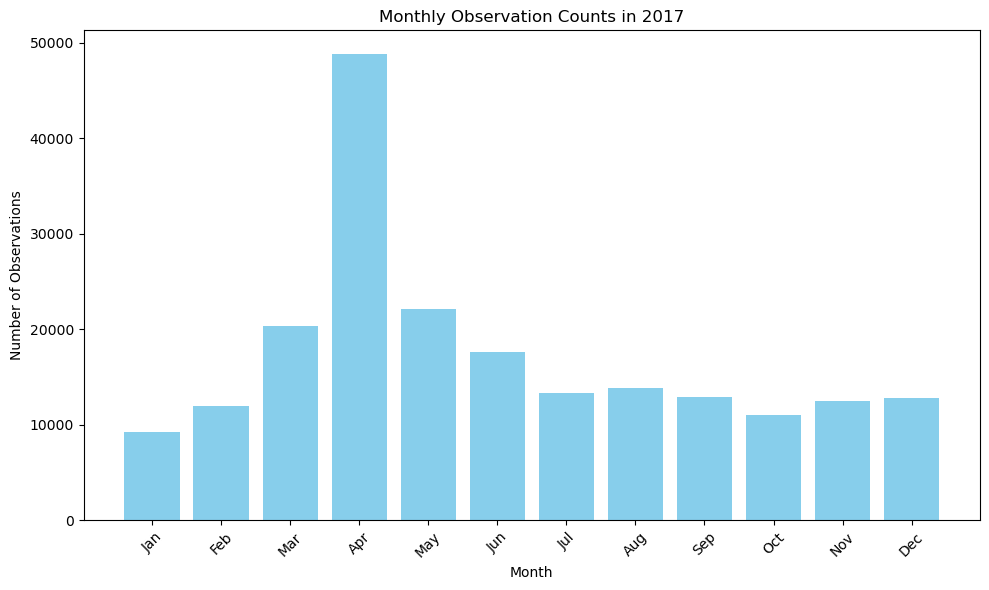

In [191]:
#Test
sf_2017['month'] = sf_2017['time_observed_at'].dt.month

# Group by 'month' and calculate counts
monthly_counts = sf_2017.groupby('month').size()

# Define month names O(Jan to dec)
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(monthly_counts.index, monthly_counts, color='skyblue')
plt.bar(monthly_counts.index, monthly_counts, color='skyblue')


plt.title('Monthly Observation Counts in 2017')
plt.xlabel('Month')
plt.ylabel('Number of Observations')

# Set x-axis ticks to month names
plt.xticks(monthly_counts.index, labels=month_names, rotation=45)

plt.tight_layout()
plt.show()


In [353]:
#this is for every year separelty 
def observation_per_month_weekday(data, year):
    # Filter weekday data 
    weekday_data = data[data['day_type'] == 'Weekday']

    # Extract month from 'time_observed_at'
    weekday_data['month'] = weekday_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekday_data.groupby('month').size()

    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=f'Weedays - {year}')
    plt.xlabel('Month')
    plt.ylabel('Observation Count')
    plt.title(f'Observations per Month for Weekdays ({year})')
    plt.legend()
    plt.show()

    return monthly_counts


In [362]:
def observation_per_month_weekday(data, year):
    # Filter weekday data 
    weekday_data = data[data['day_type'] == 'Weekday'].copy()

    # Extract month from 'time_observed_at'
    weekday_data['month'] = weekday_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekday_data.groupby('month').size()
  
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]

    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts

In [363]:
def observation_per_month_weekend(data, year):
    # Filter weekday data 
    weekend_data = data[data['day_type'] == 'Weekend'].copy()

    # Extract month from 'time_observed_at'
    weekend_data['month'] = weekend_data['time_observed_at'].dt.month

    # Group by 'month' and calculate counts
    monthly_counts = weekend_data.groupby('month').size()
  
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]

    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts

In [192]:
def observation_per_month(data, year):
    # Extract month from 'time_observed_at'
    data['month'] = data['time_observed_at'].dt.month
    # Group by 'month' and calculate counts
    monthly_counts = data.groupby('month').size()
    # Def month names
    month_names = [calendar.month_abbr[i] for i in range(1, 13)]
    # Plotting
    plt.plot(monthly_counts.index, monthly_counts, label=str(year))
    return monthly_counts


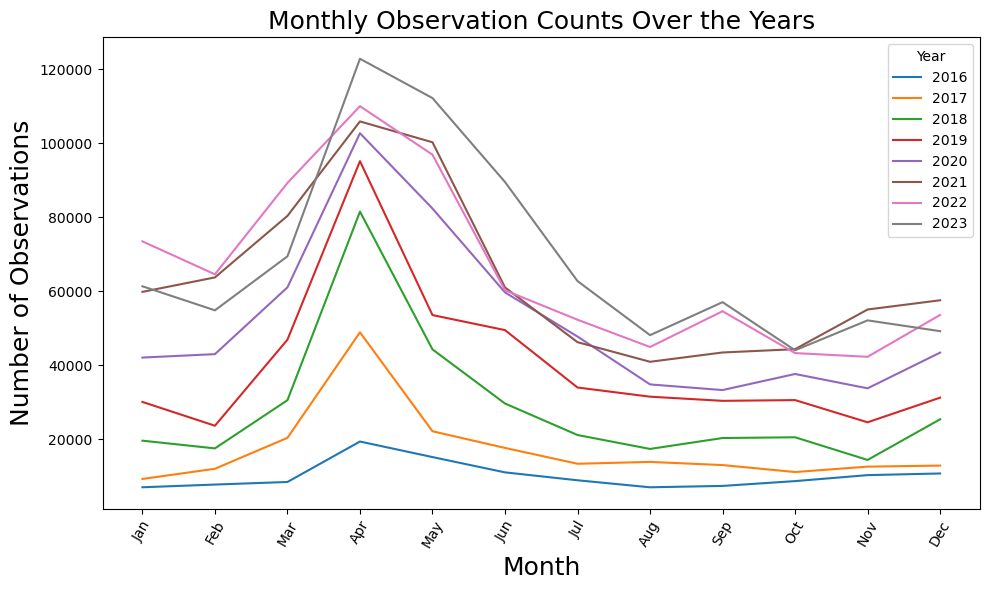

In [379]:
# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month(df, year)

plt.title('Monthly Observation Counts Over the Years', fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


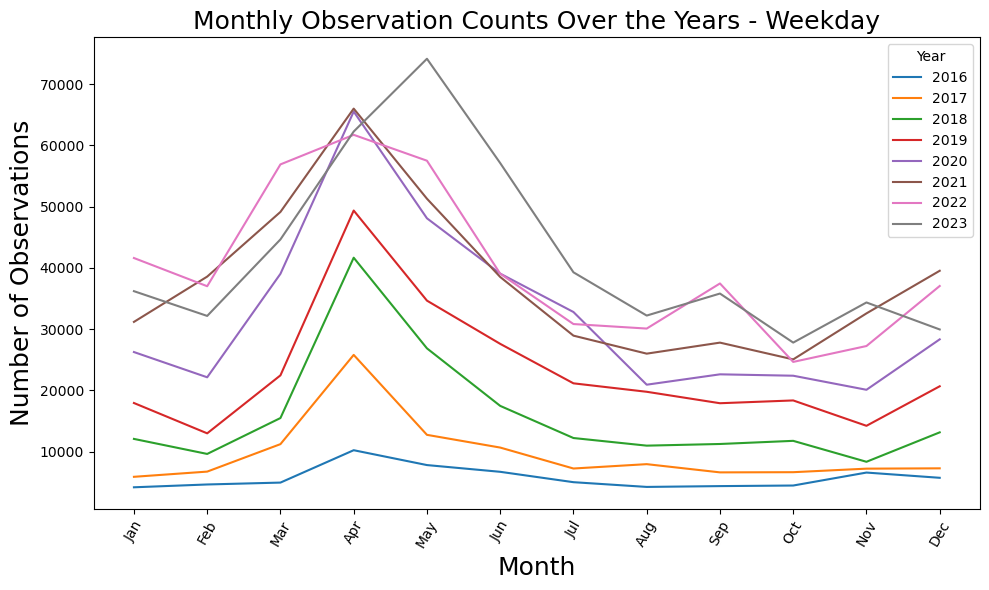

In [380]:
# Dataframes and years weekday
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month_weekday(df, year)

plt.title('Monthly Observation Counts Over the Years - Weekday',fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()


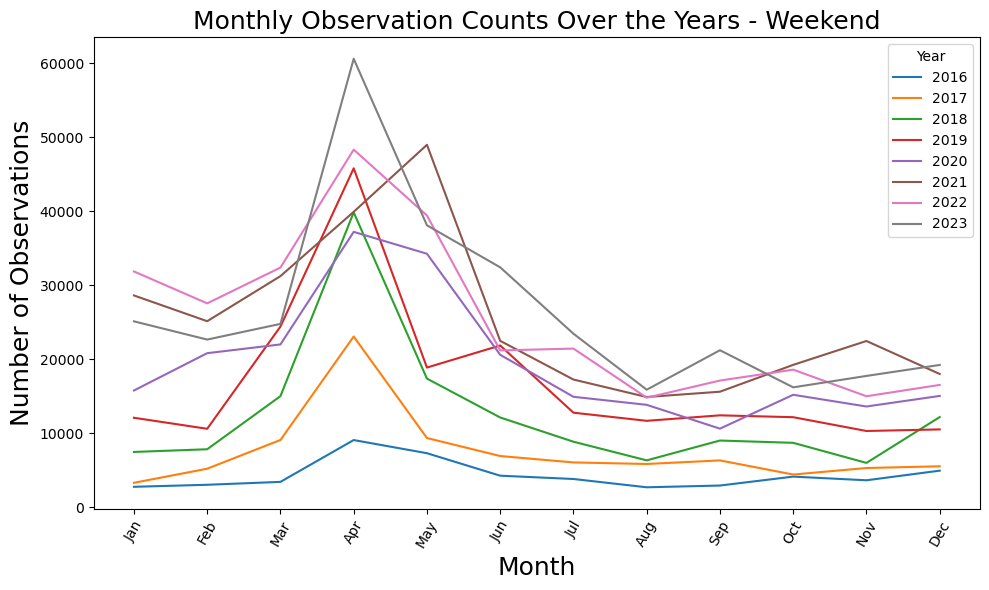

In [381]:
# Dataframes and years weekend
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

# Plot
for df, year in zip(dataframes, years):
    observation_per_month_weekend(df, year)

plt.title('Monthly Observation Counts Over the Years - Weekend',fontsize = 18)
plt.xlabel('Month',fontsize = 18)
plt.ylabel('Number of Observations',fontsize = 18)
plt.legend(title='Year', loc='upper right')
#plt.grid(True)

# Set x-axis ticks to month names
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:], rotation=60)

plt.tight_layout()
plt.show()

In [317]:
dfall['time_observed_at'] = pd.to_datetime(dfall['time_observed_at'], utc=True)
dfall['day_of_week'] = dfall['time_observed_at'].dt.dayofweek
dfall['day_type'] = dfall['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')

In [321]:
#function to calculate weekendand weekday from the column
def weekday_weekend(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column],utc=True)
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
    return df

In [322]:
sf_2016 = weekday_weekend(sf_2016, 'time_observed_at')

In [323]:
dfall.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'created_time_zone', 'created_at', 'updated_at', 'description',
       'user_id', 'quality_grade', 'reviewed_by', 'faves_count',
       'num_identification_agreements', 'num_identification_disagreements',
       'identifications_most_agree', 'identifications_most_disagree',
       'captive', 'place_guess', 'place_ids', 'longitude', 'latitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy', 'obscured',
       'species_guess', 'taxon_id', 'taxon_name', 'preferred_common_name',
       'iconic_taxon_name', 'taxon_rank', 'taxon_parent_id', 'taxon_native',
       'taxon_endemic', 'taxon_threatened', 'taxon_search_rank',
       'taxon_observations', 'identifications', 'day_of_week', 'day_type'],
      dtype='object')

In [324]:
dfall.shape

(4214727, 40)

In [325]:
df

user_id  n_obs  n_idents day_type  year
0      2291726     23         0  Weekday  2023
1      5453747      9         0  Weekday  2023
2       704353     52         1  Weekday  2023
3        31076     28         0  Weekday  2023
4      4820777    341         4  Weekday  2023
...        ...    ...       ...      ...   ...
32328  7692821      9         1  Weekday  2023
32329  7328599      1         0  Weekday  2023
32330  1472878      2         0  Weekday  2023
32331  1797107      1         0  Weekday  2023
32332  6945448      1         0  Weekday  2023

[32333 rows x 5 columns]

In [326]:
time_observed_at

NameError: name 'time_observed_at' is not defined

In [ ]:
dfall['time_observed_at'] = pd.to_datetime(dfall['time_observed_at'])

In [327]:
#test
user_counts = sf_2016.groupby(['user_id', 'day_type']).size().reset_index(name='count')
user_counts = user_counts.pivot_table(index='user_id', columns='day_type', values='count', fill_value=0).reset_index()
user_counts.columns.name = None  # Remove the top-level column name
user_counts = user_counts[(user_counts['Weekday'] > 10) & (user_counts['Weekend'] > 10)]
user_counts

user_id  Weekday  Weekend
0           1      763     1875
2          17       55       84
3          28     1610      713
5         181       32      109
8         354       90       15
...       ...      ...      ...
5449  2866445       14       28
5569  4018062      236       40
5581  4092969       15       20
5589  4176670       20       16
5658  5946523      131       36

[323 rows x 3 columns]

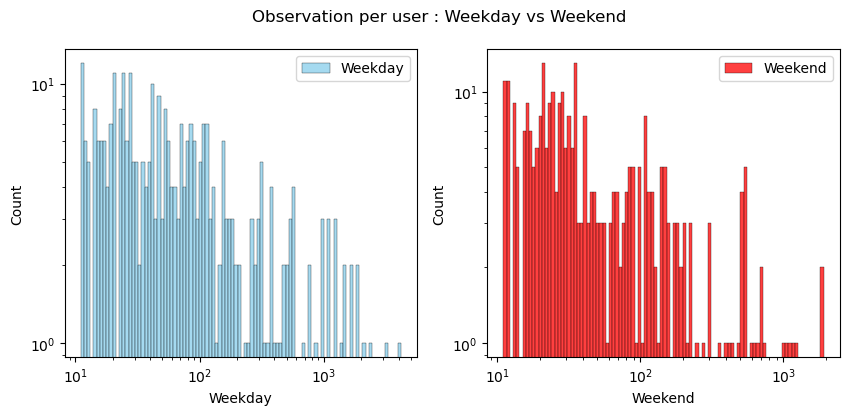

In [328]:
user_counts = user_counts[(user_counts['Weekday'] > 0) & (user_counts['Weekend'] > 0)]

#  subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# subplot (axs[0])
sns.histplot(data=user_counts, x="Weekday", log_scale=(True, True), color="skyblue", label="Weekday", bins=100, ax=axs[0])

# subplot (axs[1])
sns.histplot(data=user_counts, x="Weekend",log_scale=(True, True), color="red", label="Weekend", bins=100, ax=axs[1])

# Add legend 
axs[0].legend()
axs[1].legend()

# Title
plt.suptitle('Observation per user : Weekday vs Weekend')


plt.show()


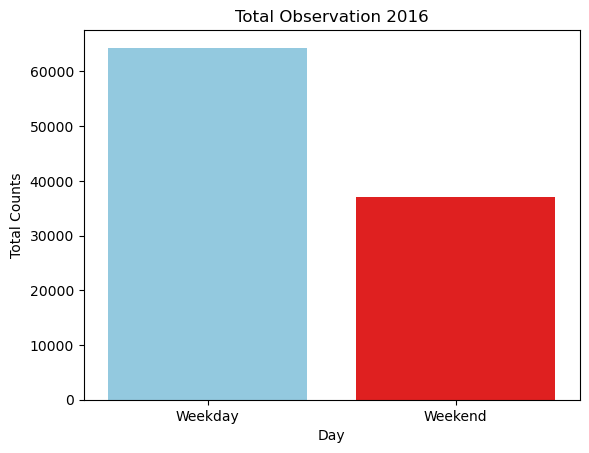

Day  Total Counts
0  Weekday         64344
1  Weekend         37069

In [373]:
total_counts_df = pd.DataFrame({
    'Day': ['Weekday', 'Weekend'],
    'Total Counts': [user_counts['Weekday'].sum(), user_counts['Weekend'].sum()]
})


sns.barplot(x='Day', y='Total Counts', data=total_counts_df, palette=['skyblue', 'red']).set(title='Total Observation 2016')


# Show the plot
plt.show()
total_counts_df

/var/folders/7p/w5myjh6j1wl3m52tqz_3fmww0000gn/T/ipykernel_7411/1367311288.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(user_counts["Weekday"], color="skyblue", label="Weekday", hist_kws={"alpha": 0.7})
/var/folders/7p/w5myjh6j1wl3m52tqz_3fmww0000gn/T/ipykernel_7411/1367311288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147e

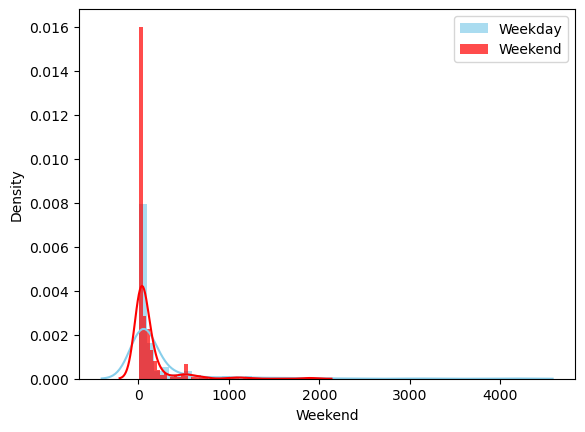

In [335]:
sns.distplot(user_counts["Weekday"], color="skyblue", label="Weekday", hist_kws={"alpha": 0.7})
sns.distplot(user_counts["Weekend"], color="red", label="Weekend", hist_kws={"alpha": 0.7})
plt.legend()
plt.show()

# Create a log-log line plot
ax = sns.displot(data=user_counts, x="Weekday", bins=100,log=True)
ax = sns.displot(data=user_counts, x="Weekend", bins=100,log=True)
ax.set(xlabel='observation per user', ylabel='frequency',title="Observation per user")

In [194]:
user_count = sf_2016.groupby(['user_id', 'day_type']).size().reset_index(name='count')
user_count

user_id day_type  count
0           1  Weekday    763
1           1  Weekend   1875
2          14  Weekend      1
3          17  Weekday     55
4          17  Weekend     84
...       ...      ...    ...
7295  7158309  Weekend      1
7296  7286727  Weekday      1
7297  7321468  Weekday      1
7298  7413809  Weekday      1
7299  7504933  Weekday      1

[7300 rows x 3 columns]

## General Statistics 

### Number of Observation per year 

In [195]:
sf_2023.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'created_time_zone', 'created_at', 'updated_at', 'description',
       'user_id', 'quality_grade', 'reviewed_by', 'faves_count',
       'num_identification_agreements', 'num_identification_disagreements',
       'identifications_most_agree', 'identifications_most_disagree',
       'captive', 'place_guess', 'place_ids', 'longitude', 'latitude',
       'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy', 'obscured',
       'species_guess', 'taxon_id', 'taxon_name', 'preferred_common_name',
       'iconic_taxon_name', 'taxon_rank', 'taxon_parent_id', 'taxon_native',
       'taxon_endemic', 'taxon_threatened', 'taxon_search_rank',
       'taxon_observations', 'identifications', 'day_of_week', 'day_type',
       'month'],
      dtype='object')

In [8]:
research_grade = (sf_2016['quality_grade'].value_counts())
research_grade

research    89599
needs_id    38533
casual      12488
Name: quality_grade, dtype: int64

In [9]:
def research_grade(df):

    research_grade = (df['quality_grade'].value_counts())
    #research_grade = df.groupby(['quality_grade'])
    #research_grade_p = (df['quality_grade'].value_counts(normalize=True))
    #pd.concat([research_grade_c,research_grade_p], axis=1,keys=['research_grade_c','research_grade_c'])
    return research_grade

In [10]:
datasets = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

data_quality_per_year = {}

for i, df in enumerate(datasets):
    year = years[i]
    data_quality_per_year[year] = research_grade(df)
    print(f'Research grades {year}:')
    print("\n".join([f"{key:<10} {value}" for key, value in data_quality_per_year[year].items()]))


Research grades 2016:
research   89599
needs_id   38533
casual     12488
Research grades 2017:
research   138087
needs_id   58124
casual     19999
Research grades 2018:
research   217744
needs_id   98705
casual     33041
Research grades 2019:
research   295808
needs_id   149002
casual     50056
Research grades 2020:
research   373000
needs_id   189543
casual     69784
Research grades 2021:
research   442573
needs_id   258069
casual     63992
Research grades 2022:
research   463080
needs_id   268648
casual     57804
Research grades 2023:
research   436111
needs_id   337932
casual     53005


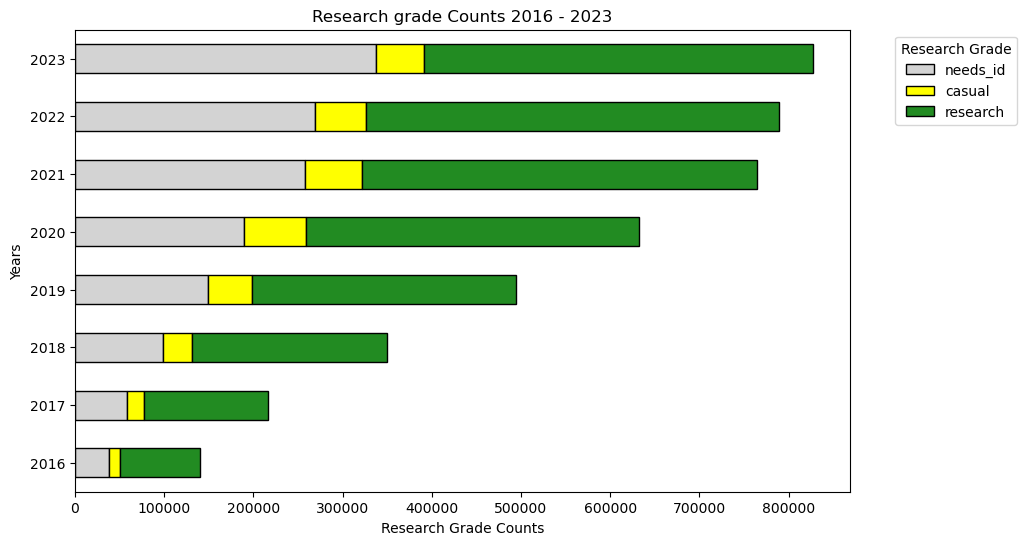

In [11]:
datasets = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020,sf_2021,sf_2022,sf_2023]
years = range(2016, 2024)


#create a empty list to store counts
research_grade_counts = []

#iterate through each DF
for year, data in zip(years, datasets):
    #count research grade for each category
    research_grade_c = data['quality_grade'].value_counts()[['needs_id','casual','research']]
    
    #append the count to the list
    research_grade_counts.append(research_grade_c)
    
#create a dataframe for list of c

res_gra_count = pd.DataFrame(research_grade_counts,index=years)

#percentage
#percentage = res_gra_count.divide(res_gra_count.sum(axis=1), axis=0) * 100

#plot
pal = ["lightgray", "yellow", "forestgreen"]
ax = res_gra_count.plot(kind='barh', stacked=True, color= pal, figsize=(10, 6),edgecolor = "black")
#colormap=
ax.set_title('Research grade Counts 2016 - 2023')
ax.set_xlabel('Research Grade Counts')
ax.set_ylabel('Years')
ax.legend(title='Research Grade', bbox_to_anchor=(1.05, 1), loc='upper left')



In [ ]:
res_gra_count

In [ ]:
for year, data in data_quality_per_year.items():
    plt.figure(figsize=(4, 2))
    plt.bar(data.index, data.values)
    plt.xlabel('Quality Grade')
    plt.ylabel('Count')
    plt.title(f'Research Grades {year}')
    plt.show()

In [ ]:
import pandas as pd

# Concatenate all data frames
combined_df = pd.concat(datasets, ignore_index=True)

# Get research grades
research_grades_all = research_grade(combined_df)
print(research_grades_all)

# Plotting all years' data together
plt.figure(figsize=(5, 3))
plt.bar(research_grades_all.index, research_grades_all.values)
plt.xlabel('Quality Grade')
plt.ylabel('Count')
plt.title('Research Grades across Years')
plt.show()


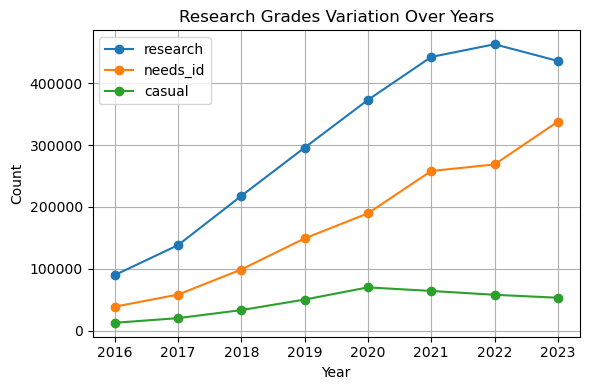

In [12]:
#more efficient to plot this way

all_data = {}
for year, data in data_quality_per_year.items():
    for grade, count in data.items():
        if grade not in all_data:
            all_data[grade] = []
        all_data[grade].append((year, count))

# Plotting line graphs for different grades
plt.figure(figsize=(6, 4))
for grade, values in all_data.items():
    years, counts = zip(*values)
    plt.plot(years, counts, marker='o', label=grade)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Research Grades Variation Over Years')
plt.xticks(list(data_quality_per_year.keys()))  # Ensure all years are shown on x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

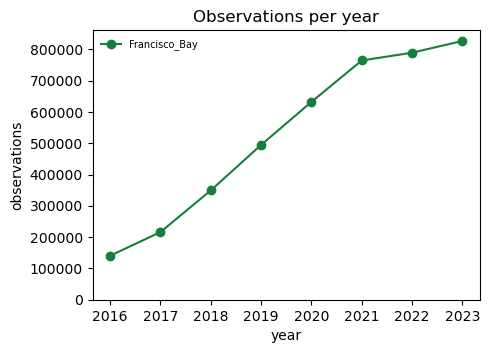

In [13]:
fig = plt.figure(figsize=(5,3.5))
for city, dfyears in dfs.items():
    x=[]; y=[];
    for year, df in dfyears.items():
        x.append(year)
        y.append(len(df))
    plt.plot(x, y, '-o', label=city, color=cities_colors[city][-1])
from matplotlib.ticker import MultipleLocator
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("year")
plt.ylabel("observations")
plt.title("Observations per year")
plt.legend(frameon=False, fontsize=7, loc='upper left')
#plt.grid(True)
plt.ylim(ymin=0)
plt.show()

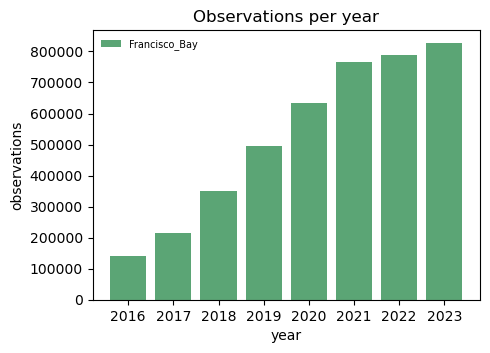

In [371]:
#bar plot to observation per year

fig = plt.figure(figsize=(5, 3.5))

for city, dfyears in dfs.items():
    x = []
    y = []
    for year, df in dfyears.items():
        x.append(year)
        y.append(len(df))
    plt.bar(x, y, label=city, color=cities_colors[city][-1], alpha=0.7)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("year")
plt.ylabel("observations")
plt.title("Observations per year")
plt.legend(frameon=False, fontsize=7, loc='upper left')
plt.ylim(ymin=0)
plt.show()


In [14]:
sf_2016.shape[0]

140620

2016         NaN
2017    178415.0
2018    282850.0
2019    422178.0
2020    563596.5
2021    698480.5
2022    777083.0
2023    808290.0
dtype: float64


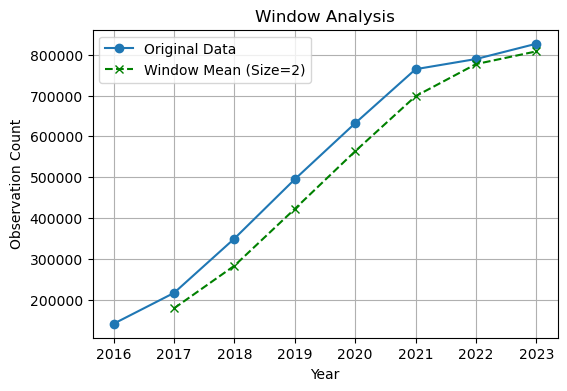

In [15]:
#Window Analyis 
plt.figure(figsize=(6, 4))
data = [sf_2016.shape[0], sf_2017.shape[0], sf_2018.shape[0], sf_2019.shape[0],sf_2020.shape[0],sf_2021.shape[0],sf_2022.shape[0],sf_2023.shape[0]]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022,2023]

# Convert the data to a Pandas Series
series = pd.Series(data, index=years)

window_size = 2  # Define the window size for analysis

# Perform window analysis (calculate mean within the window)
window_mean = series.rolling(window=window_size).mean()

print(window_mean)


# Plot the original data
plt.plot(series.index, series.values, label='Original Data', marker='o', linestyle='-')

# Plot the window mean
plt.plot(window_mean.index, window_mean.values, label=f'Window Mean (Size={window_size})', marker='x',color='green', linestyle='--')
#plt.vlines(series.index, [0], series.values, colors='blue', linestyles='dashed', alpha=0.5)  # Vertical bar lines

plt.xlabel('Year')
plt.ylabel('Observation Count')
plt.title('Window Analysis')
plt.legend()
plt.xticks(years)
plt.grid(True)
plt.show()



Intervals between years: [ 75590 133280 145376 137461 132307  24898  37516]
Variance between successive years: 2246814733.8367343


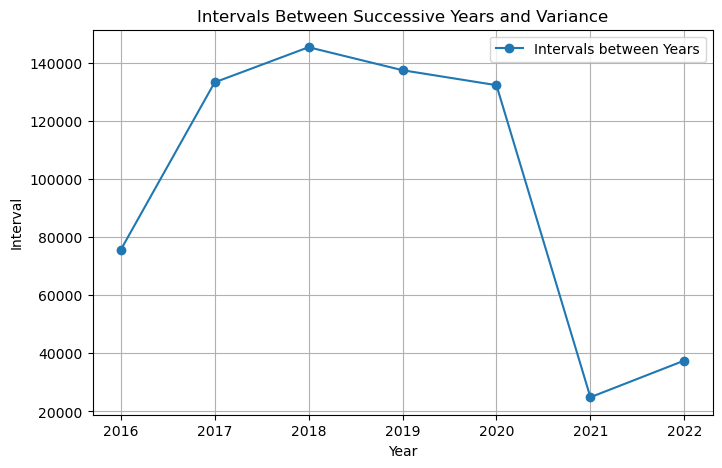

In [16]:
#calculating the interval. Interval is the differecebetween observations in consecutive years

observations = [sf_2016.shape[0], sf_2017.shape[0], sf_2018.shape[0], sf_2019.shape[0],sf_2020.shape[0],sf_2021.shape[0],sf_2022.shape[0],sf_2023.shape[0]]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022,2023]

# Convert the data to a Pandas Series
series = pd.Series(observations, index=years)

# Calculate the interval
intervals = np.diff(series)  # calculate the differences between years

# Calculate variance between observations of successive years, 
#"variance" is a measure of the spread or variability among these differences. my note 
variance_between_years = np.var(intervals)

print("Intervals between years:", intervals)
print("Variance between successive years:", variance_between_years)


# Plotting the intervals between successive years
plt.figure(figsize=(8, 5))
plt.plot(range(2016, 2023), intervals, marker='o', linestyle='-', label='Intervals between Years')
#plt.axhline(y=variance_between_years, color='r', linestyle='--', label='Variance between Intervals')

plt.xlabel('Year')
plt.ylabel('Interval')
plt.title('Intervals Between Successive Years and Variance')
plt.legend()
plt.grid(True)
plt.show()

### Unique users per year 

In [17]:
# unique users for each year 
def unique_users(df):

    #total_users = len(df)
    user_unique = len(df['user_id'].value_counts())
    
    return user_unique

In [18]:
uni_users_2016 = unique_users(sf_2016)
print('Total number of participants in San Francisco 2016 :', uni_users_2016)

uni_users_2017 = unique_users(sf_2017)
print('Total number of participants in San Francisco 2017 :', uni_users_2017)

uni_users_2018 = unique_users(sf_2018)
print('Total number of participants in San Francisco 2018 :', uni_users_2018)

uni_users_2019 = unique_users(sf_2019)
print('Total number of participants in San Francisco 2019 :', uni_users_2019)

uni_users_2020 = unique_users(sf_2020)
print('Total number of participants in San Francisco 2020 :', uni_users_2020)

uni_users_2021 = unique_users(sf_2021)
print('Total number of participants in San Francisco 2021 :', uni_users_2021)

uni_users_2022 = unique_users(sf_2022)
print('Total number of participants in San Francisco 2022 :', uni_users_2022)

uni_users_2023 = unique_users(sf_2023)
print('Total number of participants in San Francisco 2023 :', uni_users_2023)



Total number of participants in San Francisco 2016 : 5702
Total number of participants in San Francisco 2017 : 9061
Total number of participants in San Francisco 2018 : 16002
Total number of participants in San Francisco 2019 : 24362
Total number of participants in San Francisco 2020 : 29781
Total number of participants in San Francisco 2021 : 34270
Total number of participants in San Francisco 2022 : 34619
Total number of participants in San Francisco 2023 : 32843


In [19]:
#method 2
datasets = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

unique_users_per_year = {}

for i, df in enumerate(datasets):
    year = years[i]
    unique_users_per_year[year] = unique_users(df)
    print(f'Total number of participants in San Francisco {year}:', unique_users_per_year[year])

# Access the counts as needed, for instance:
#print("Unique users in 2018:", unique_users_per_year[2018])



Total number of participants in San Francisco 2016: 5702
Total number of participants in San Francisco 2017: 9061
Total number of participants in San Francisco 2018: 16002
Total number of participants in San Francisco 2019: 24362
Total number of participants in San Francisco 2020: 29781
Total number of participants in San Francisco 2021: 34270
Total number of participants in San Francisco 2022: 34619
Total number of participants in San Francisco 2023: 32843


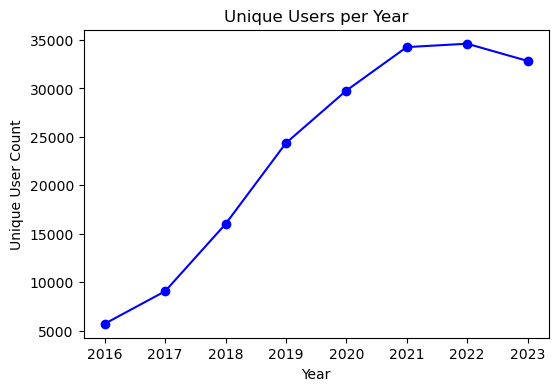

In [20]:

# Plotting
"""
unique_users_per_year.keys(): This retrieves the keys from the dictionary 
'unique_users_per_year.values(): This retrieves the values associated with the keys in the dictionary '
"""
plt.figure(figsize=(6, 4))
plt.plot(unique_users_per_year.keys(), unique_users_per_year.values(),marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Unique User Count')
plt.title('Unique Users per Year')
plt.xticks(years)
#plt.grid(axis='y')
plt.show()

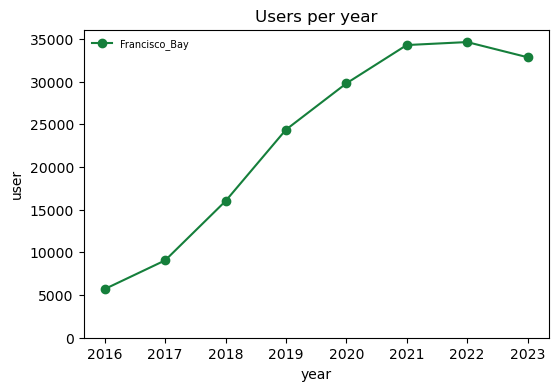

In [21]:
fig = plt.figure(figsize=(6,4))
for city, dfyears in dfs.items():
    x=[]; y=[];
    for year, df in dfyears.items():
        x.append(year)
        y.append(len(df['user_id'].unique()))
    plt.plot(x, y, '-o', label=city, color=cities_colors[city][-1])
from matplotlib.ticker import MultipleLocator
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("year")
plt.ylabel("user")
plt.title("Users per year")
plt.legend(frameon=False, fontsize=7, loc='upper left')

plt.ylim(ymin=0)
plt.show()

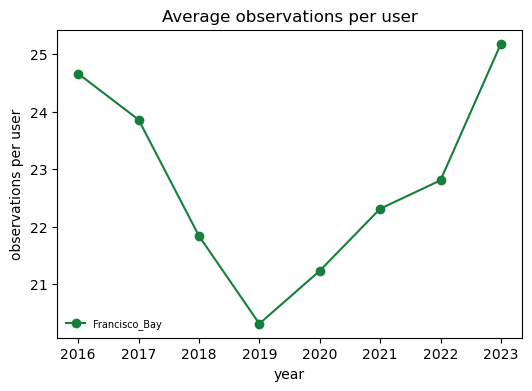

In [22]:
fig = plt.figure(figsize=(6,4))
for city, dfyears in dfs.items():
    x=[]; y=[];
    for year, df in dfyears.items():
        x.append(year)
        n_user = len(df['user_id'].unique())
        n_obs = len(df)
        y.append(n_obs/n_user)
    plt.plot(x, y, '-o', label=city, color=cities_colors[city][-1])
from matplotlib.ticker import MultipleLocator
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("year")
plt.ylabel("observations per user")
plt.title("Average observations per user")
plt.legend(frameon=False, fontsize=7, loc='lower left')

#plt.ylim(ymin=0)
plt.show()

## Number of Observation and Identification made by users each year

In [167]:
def observation_per_user(data, year):
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    ax = sns.displot(data=obs_per_user, x="total_obs", log_scale=(True, True), kde_kws={'log_scale': (True, True)})
    ax.set(xlabel='observation per user', ylabel='frequency', title=f"Observation per user - {year}")
    plt.show()

# Example usage:
# observation_per_user(your_data_frame, "2023")


In [214]:
def observation_per_user(data, year):
    fig = plt.figure(figsize=(6,4))
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    plt.plot(obs_per_user['total_obs'])

    # Fit a regression line using linear regression on the log-transformed data
    x = np.log(obs_per_user.index + 1)  # Adding 1 to avoid log(0)
    y = np.log(obs_per_user['total_obs'])
    
    coefficients = np.polyfit(x, y, 1)
    fit_line = np.exp(coefficients[1]) * (obs_per_user.index + 1)**coefficients[0]

    
    # Plot the regression line
    plt.plot(obs_per_user.index + 1, fit_line, label='Regression Line', linestyle='--')
    
    # Print regression line coefficients
    original_scale_slope = np.exp(coefficients[0])

    print(f"Original Scale Slope: {original_scale_slope}")
    print(f'Regression Line Coefficients (log-log scale): Intercept={coefficients[1]}, Slope={coefficients[0]}')
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Observation per user')
    plt.ylabel('Frequency')
    plt.title(f"Observation per user - {year}")
    plt.show()
    plt.show()

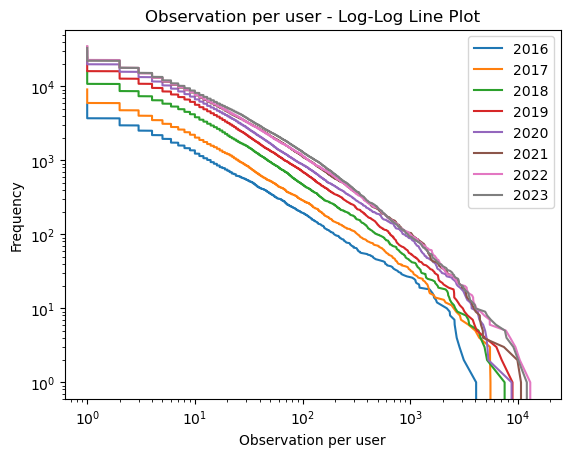

In [25]:
def observation_per_user(data, year):
    obs_per_user = data['user_id'].value_counts().rename_axis('user_id').reset_index(name='total_obs')
    # Use plt.plot() with log scales for log-log line plot
    plt.plot(obs_per_user['total_obs'], obs_per_user.index, label=str(year))

# Dataframes and years
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Plot each year on the same log-log line plot
for df, year in zip(dataframes, years):
    observation_per_user(df, year)

# Set labels and title
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Observation per user')
plt.ylabel('Frequency')
plt.title('Observation per user - Log-Log Line Plot')
plt.legend()
plt.show()


Original Scale Slope: 0.2388473575719806
Regression Line Coefficients (log-log scale): Intercept=12.295297357701319, Slope=-1.43193060233493


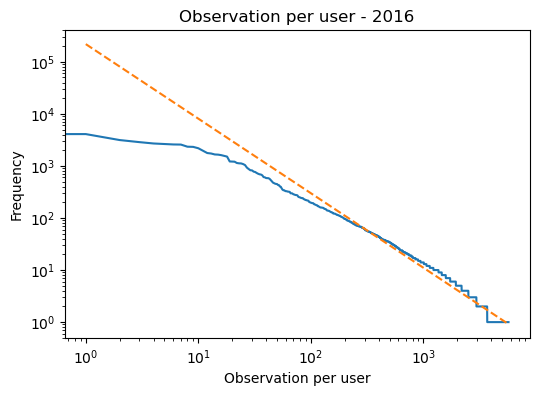

Original Scale Slope: 0.24265143259322364
Regression Line Coefficients (log-log scale): Intercept=12.840595057134319, Slope=-1.416129299199345


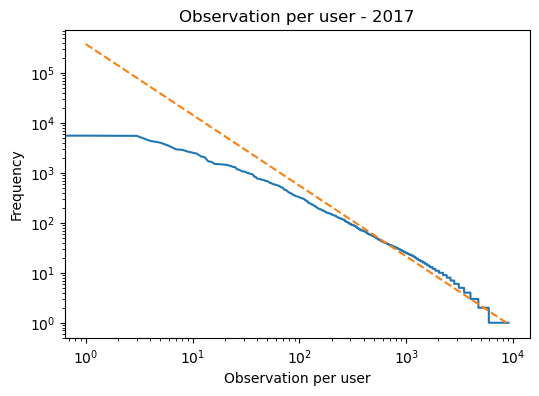

Original Scale Slope: 0.2466329191324085
Regression Line Coefficients (log-log scale): Intercept=13.55058334995828, Slope=-1.3998542051400389


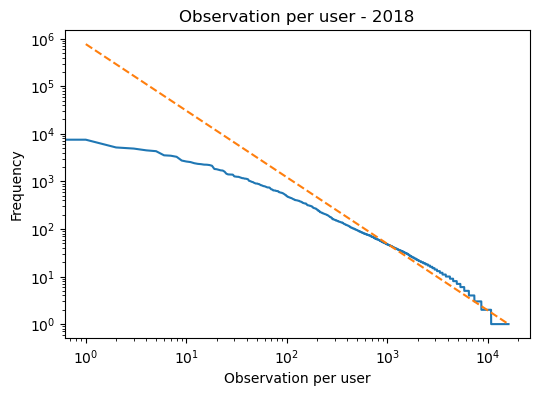

Original Scale Slope: 0.24992976492407046
Regression Line Coefficients (log-log scale): Intercept=13.970028177329109, Slope=-1.3865753408947288


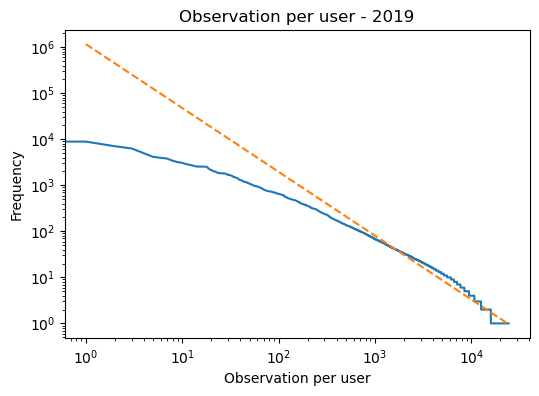

Original Scale Slope: 0.24992976492407046
Regression Line Coefficients (log-log scale): Intercept=13.970028177329109, Slope=-1.3865753408947288


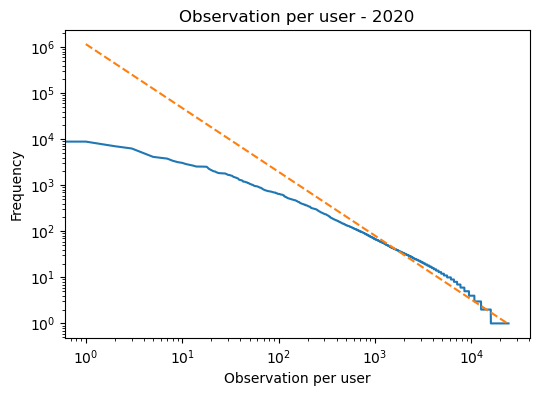

Original Scale Slope: 0.24956610237775903
Regression Line Coefficients (log-log scale): Intercept=14.267709901734955, Slope=-1.3880314594909904


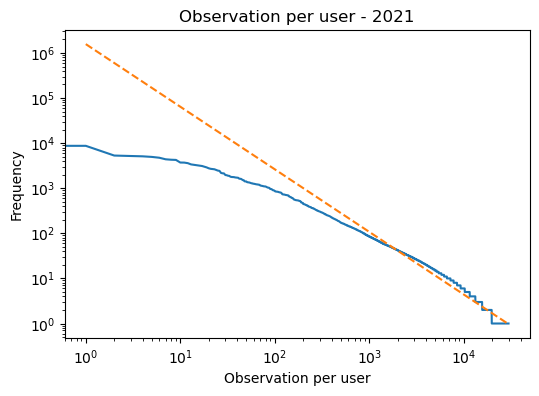

Original Scale Slope: 0.2430851026793964
Regression Line Coefficients (log-log scale): Intercept=14.69890174236194, Slope=-1.4143436801655338


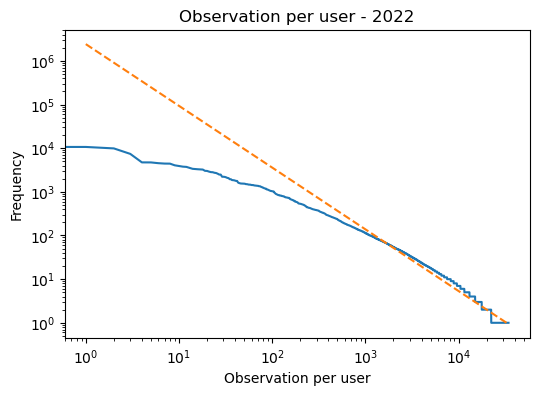

Original Scale Slope: 0.24308166809617435
Regression Line Coefficients (log-log scale): Intercept=14.710982781645795, Slope=-1.414357809404423


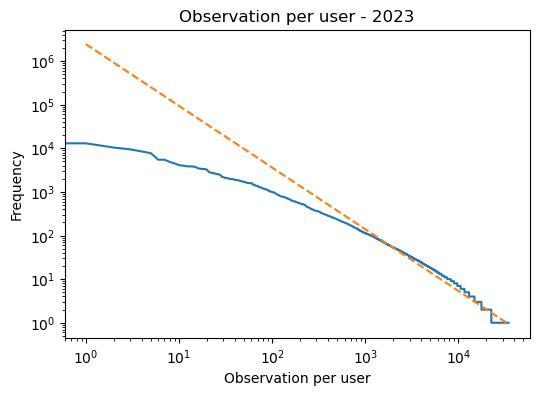

In [215]:
dataframes = [sf_2016, sf_2017, sf_2018, sf_2019,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

for df, year in zip(dataframes, years):
    observation_per_user(df, year)

    

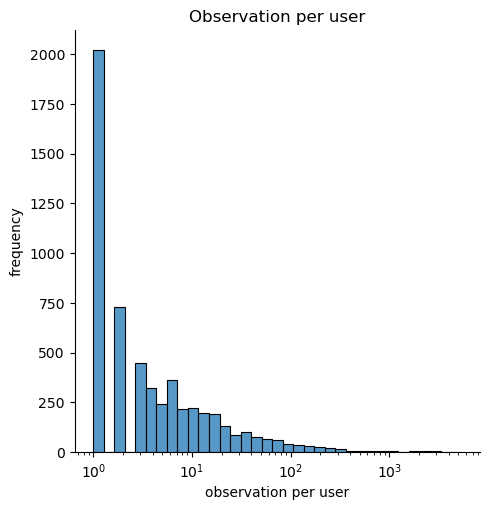

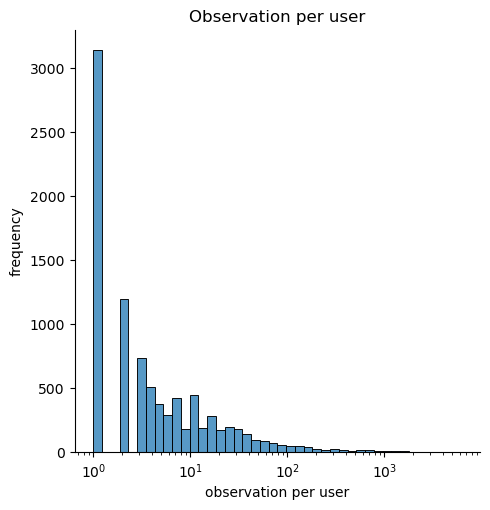

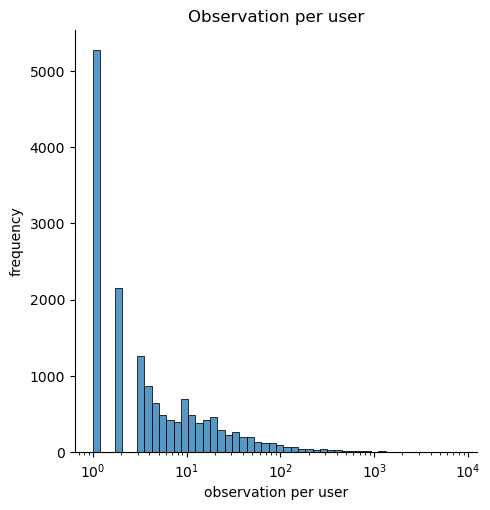

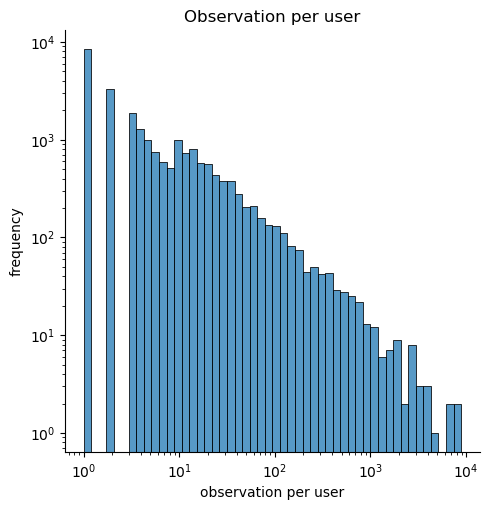

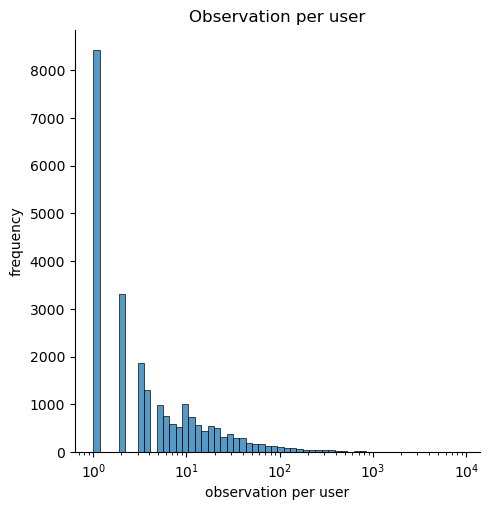

In [201]:
obs_per_user_2016 = sf_2016['user_id'].value_counts()
obs_per_user_2016 = obs_per_user_2016.rename_axis('user_id').reset_index(name='total_obs')

obs_per_user_2017 = sf_2017['user_id'].value_counts()
obs_per_user_2017 = obs_per_user_2017.rename_axis('user_id').reset_index(name='total_obs')

obs_per_user_2018 = sf_2018['user_id'].value_counts()
obs_per_user_2018 = obs_per_user_2018.rename_axis('user_id').reset_index(name='total_obs')

obs_per_user_2019 = sf_2019['user_id'].value_counts()
obs_per_user_2019 = obs_per_user_2019.rename_axis('user_id').reset_index(name='total_obs')

obs_per_user_2020 = sf_2020['user_id'].value_counts()
obs_per_user_2020 = obs_per_user_2020.rename_axis('user_id').reset_index(name='total_obs')

obs_per_user_2021 = sf_2021['user_id'].value_counts()
obs_per_user_2021 = obs_per_user_2021.rename_axis('user_id').reset_index(name='total_obs')

obs_per_user_2022 = sf_2022['user_id'].value_counts()
obs_per_user_2022 = obs_per_user_2022.rename_axis('user_id').reset_index(name='total_obs')

obs_per_user_2023 = sf_2023['user_id'].value_counts()
obs_per_user_2023 = obs_per_user_2023.rename_axis('user_id').reset_index(name='total_obs')

ax = sns.displot(data=obs_per_user_2016, x="total_obs", log_scale=True)
ax.set(xlabel='observation per user', ylabel='frequency',title="Observation per user")

ax = sns.displot(data=obs_per_user_2017, x="total_obs", log_scale=True)
ax.set(xlabel='observation per user', ylabel='frequency',title="Observation per user")

ax = sns.displot(data=obs_per_user_2018, x="total_obs", log_scale=True)
ax.set(xlabel='observation per user', ylabel='frequency',title="Observation per user")

ax = sns.displot(data=obs_per_user_2019, x="total_obs", log_scale=(True, True),bins=50)
ax.set(xlabel='observation per user', ylabel='frequency', title="Observation per user")

ax = sns.displot(data=obs_per_user_2019, x="total_obs", log_scale=True)
ax.set(xlabel='observation per user', ylabel='frequency',title="Observation per user")


In [28]:
obs_per_user_2016.sort_values(by='total_obs', ascending = False)

user_id  total_obs
0        3342       5404
1       16101       4089
2       13979       3141
3      179103       2864
4        3494       2699
...       ...        ...
4350  2426657          1
4349  3704356          1
4348   731996          1
4347  3356012          1
5701  6273589          1

[5702 rows x 2 columns]

In [29]:
#verifying the max value
max_observation = obs_per_user_2016['total_obs'].max()
print("Maximum observation per user:", max_observation)


Maximum observation per user: 5404


[Text(0.5, 0, 'observation per user'),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Observation per user')]

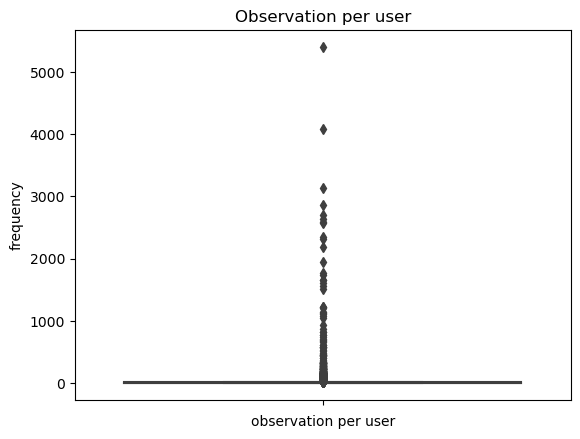

In [30]:
ax = sns.boxplot(data=obs_per_user_2016, y="total_obs")
ax.set(xlabel='observation per user', ylabel='frequency', title="Observation per user")

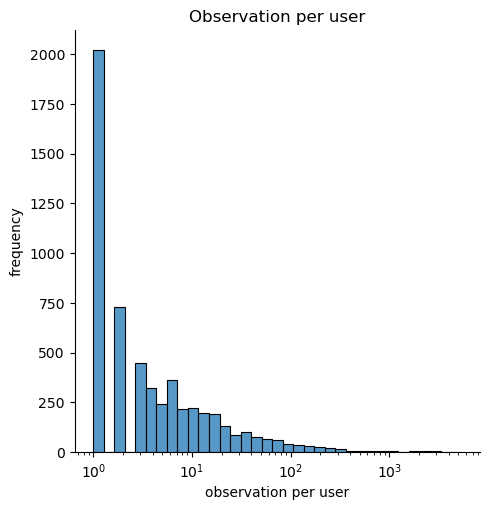

In [31]:
ax = sns.displot(data=obs_per_user_2016, x="total_obs", log_scale=True)
ax.set(xlabel='observation per user', ylabel='frequency',title="Observation per user")

In [32]:
obs_per_user_2017.sort_values(by='total_obs', ascending = False)

user_id  total_obs
0        3342       6290
1       29323       5556
2        8778       5504
3      179103       5501
4       16101       4370
...       ...        ...
6969   650951          1
6970   405266          1
6971   746040          1
6972   773429          1
9060  7403650          1

[9061 rows x 2 columns]

In [33]:
obs_per_user_2018.sort_values(by='total_obs', ascending = False)

user_id  total_obs
0       209572       8010
1         8778       7520
2       179103       5165
3        17695       4893
4         2991       4490
...        ...        ...
12485   857330          1
12484   889845          1
12483   758980          1
12482    30369          1
16001  1883444          1

[16002 rows x 2 columns]

In [216]:
obs_per_user_2019.sort_values(by='total_obs', ascending = False)

user_id  total_obs
0        34038       8914
1         8778       8901
2       209572       7069
3         2991       6305
4       896378       4988
...        ...        ...
18743  1713545          1
18742   521904          1
18741  1384260          1
18740  1628042          1
24361  1883444          1

[24362 rows x 2 columns]

In [217]:
obs_per_user_2020.sort_values(by='total_obs', ascending = False)

user_id  total_obs
0        34038       9492
1         8778       8725
2         2991       5310
3        17695       5202
4        16101       5103
...        ...        ...
23090   819031          1
23091  2976739          1
23092   977086          1
23093  5176114          1
29780  7678909          1

[29781 rows x 2 columns]

In [218]:
obs_per_user_2021.sort_values(by='total_obs', ascending = False)

user_id  total_obs
0        17695      13693
1        34038      10672
2         8778       9882
3       861881       7403
4        16101       4728
...        ...        ...
26296  2230595          1
26297   434150          1
26298   453371          1
26299  2602361          1
34269  1241888          1

[34270 rows x 2 columns]

In [219]:
obs_per_user_2022.sort_values(by='total_obs', ascending = False)

user_id  total_obs
0        17695      15385
1        34038      13012
2       861881      10397
3         8706       9471
4         8778       8467
...        ...        ...
26606  6217309          1
26607  1819737          1
26608   916635          1
26609  5359950          1
34618  2109415          1

[34619 rows x 2 columns]

In [220]:
obs_per_user_2023.sort_values(by='total_obs', ascending = False)

user_id  total_obs
0       427781      13539
1      3926887      12086
2       861881      10050
3        34038       9073
4         8706       7824
...        ...        ...
25692  1177496          1
25693  7546741          1
25694  7546763          1
25695  4439768          1
32842  6945448          1

[32843 rows x 2 columns]

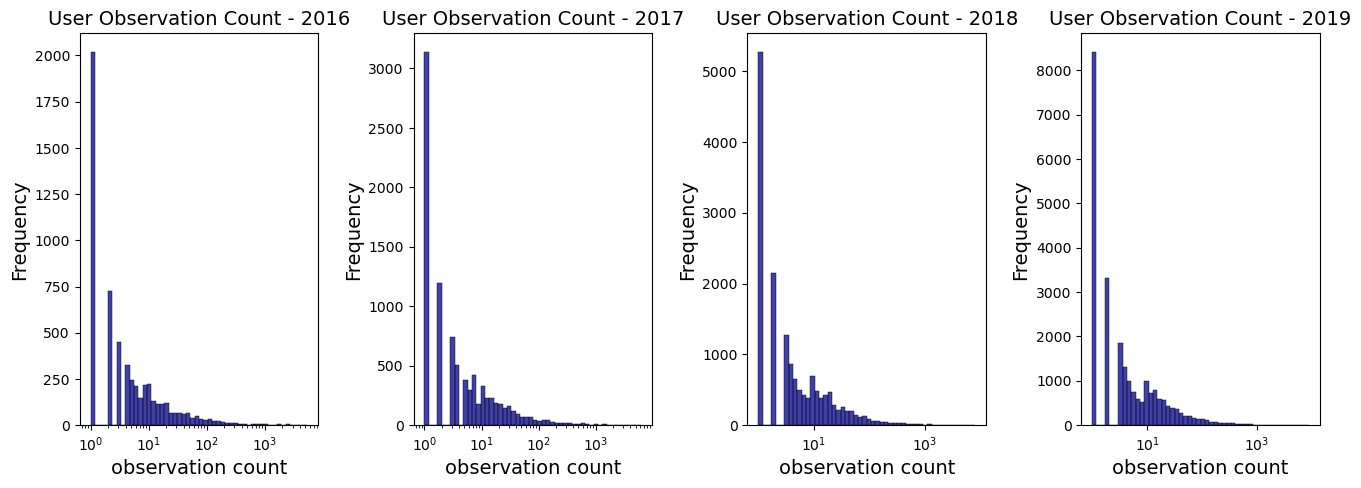

In [221]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4,figsize=(16, 4))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)


# Plot the first dataframe in the first subplot
sns.histplot(data=obs_per_user_2016, x='total_obs', log_scale=True, bins=50, color='darkblue', ax=ax1)
ax1.set_title("User Observation Count - 2016",fontsize =14)
ax1.set_xlabel('observation count',fontsize =14)
ax1.set_ylabel('Frequency',fontsize =14)

# Plot the second dataframe in the second subplot
sns.histplot(data=obs_per_user_2017, x='total_obs', log_scale=True, bins=50, color='darkblue',ax=ax2)
ax2.set_title('User Observation Count - 2017',fontsize =14)
ax2.set_xlabel('observation count',fontsize =14)
ax2.set_ylabel('Frequency',fontsize =14)

# Plot the third dataframe in the third subplot
sns.histplot(data=obs_per_user_2018, x='total_obs', log_scale=True, bins=50, color='darkblue',ax=ax3)
ax3.set_title("User Observation Count - 2018", fontsize =14)
ax3.set_xlabel('observation count',fontsize =14)
ax3.set_ylabel('Frequency',fontsize =14)

# Plot the third dataframe in the third subplot
sns.histplot(data=obs_per_user_2019, x='total_obs', log_scale=True, bins=50, color='darkblue',ax=ax4)
ax4.set_title("User Observation Count - 2019", fontsize =14)
ax4.set_xlabel('observation count',fontsize =14)
ax4.set_ylabel('Frequency',fontsize =14)

# Show the plot
plt.show()

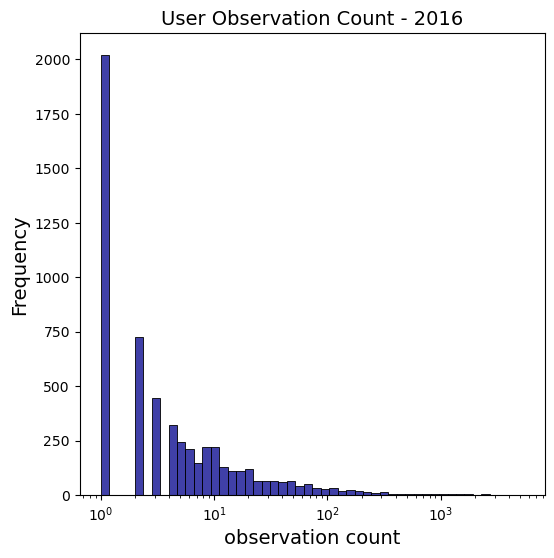

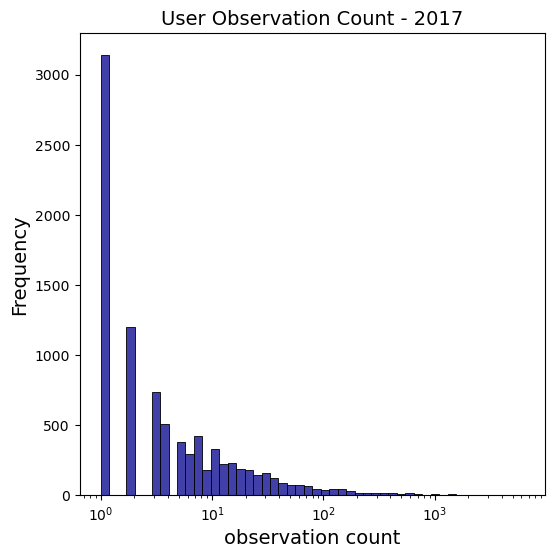

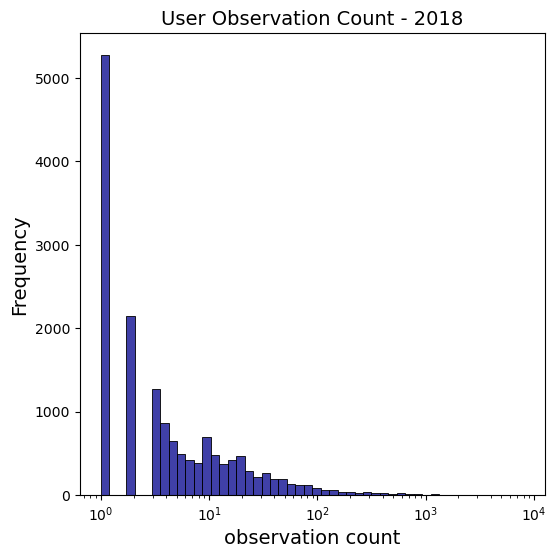

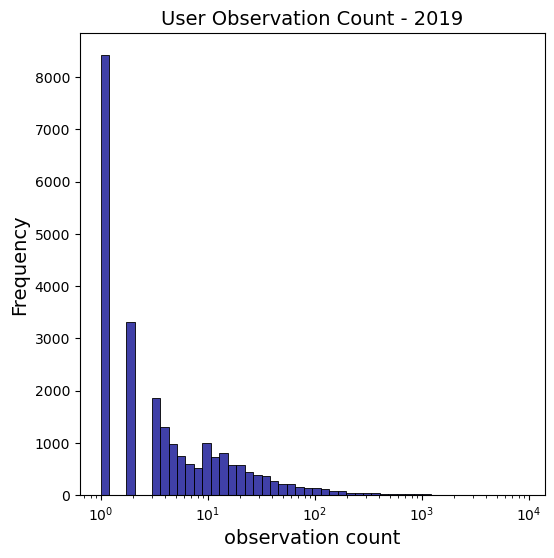

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframes for different years (obs_per_user_2016, obs_per_user_2017, obs_per_user_2018, obs_per_user_2019)
dataframes = [obs_per_user_2016, obs_per_user_2017, obs_per_user_2018, obs_per_user_2019]
years = ['2016', '2017', '2018', '2019']

for i, df in enumerate(dataframes):
    plt.figure(figsize=(6,6))  # Adjust the figure size as needed
    sns.histplot(data=df, x='total_obs', log_scale=True, bins=50, color='darkblue')
    plt.title(f"User Observation Count - {years[i]}", fontsize=14)
    plt.xlabel('observation count', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()


# CNC and Non CNC 

In [223]:
def observation_identification_2016(df,start_date ='2016-04-14', end_date ='2016-04-21'):
    cnc_part = df[(df['observed_on'] >= start_date) & (df['observed_on'] <= end_date)]
    non_cnc_part = df[~df.index.isin(cnc_part.index)]
    return cnc_part, non_cnc_part 

In [224]:
def observation_identification_2017(df,start_date ='2017-04-14', end_date ='2017-04-18'):
    cnc_part = df[(df['observed_on'] >= start_date) & (df['observed_on'] <= end_date)]
    non_cnc_part = df[~df.index.isin(cnc_part.index)]
    return cnc_part, non_cnc_part 

In [225]:
def observation_identification_2018(df,start_date ='2018-04-27', end_date ='2018-04-30'):
    cnc_part = df[(df['observed_on'] >= start_date) & (df['observed_on'] <= end_date)]
    non_cnc_part = df[~df.index.isin(cnc_part.index)]
    return cnc_part, non_cnc_part 

In [226]:
def observation_identification_2019(df,start_date ='2019-04-26', end_date ='2019-04-29'):
    cnc_part = df[(df['observed_on'] >= start_date) & (df['observed_on'] <= end_date)]
    non_cnc_part = df[~df.index.isin(cnc_part.index)]
    return cnc_part, non_cnc_part 

In [227]:
def observation_identification_2020(df,start_date ='2020-04-24', end_date ='2020-04-27'):
    cnc_part = df[(df['observed_on'] >= start_date) & (df['observed_on'] <= end_date)]
    non_cnc_part = df[~df.index.isin(cnc_part.index)]
    return cnc_part, non_cnc_part 

In [228]:
def observation_identification_2021(df,start_date ='2021-04-30', end_date ='2021-05-03'):
    cnc_part = df[(df['observed_on'] >= start_date) & (df['observed_on'] <= end_date)]
    non_cnc_part = df[~df.index.isin(cnc_part.index)]
    return cnc_part, non_cnc_part 

In [229]:
def observation_identification_2022(df,start_date ='2022-04-29', end_date ='2022-05-02'):
    cnc_part = df[(df['observed_on'] >= start_date) & (df['observed_on'] <= end_date)]
    non_cnc_part = df[~df.index.isin(cnc_part.index)]
    return cnc_part, non_cnc_part 

In [230]:
def observation_identification_2023(df,start_date ='2023-04-28', end_date ='2023-05-01'):
    cnc_part = df[(df['observed_on'] >= start_date) & (df['observed_on'] <= end_date)]
    non_cnc_part = df[~df.index.isin(cnc_part.index)]
    return cnc_part, non_cnc_part 

## Saving the CNC Dataframes to a local folder 

In [ ]:
#CNC 
dataframes = [cnc_2016, cnc_2017, cnc_2018, cnc_2019, cnc_2020,cnc_2021,cnc_2022,cnc_2023] # all the dataframe
years = range(2016, 2023)

folder_path = '/Users/zahrafarook/Desktop/DataAnalysis/data/cnc/' #path to be saved

for year, df in zip(years, dataframes): 
    file_name = f'CNC_SF_{year}.csv'
    file_path = os.path.join(folder_path, file_name)
    df.to_csv(file_path, index=False)


In [ ]:
#Non CNC
dataframes = [non_cnc_2016, non_cnc_2017, non_cnc_2018, non_cnc_2019, non_cnc_2020,non_cnc_2021,non_cnc_2022,non_cnc_2023] # all the dataframe
years = range(2016, 2023)

folder_path = '/Users/zahrafarook/Desktop/DataAnalysis/data/non_cnc/' #path to be saved

for year, df in zip(years, dataframes): #pairs each year with df and iterates through both lists.
    file_name = f'NON_CNC_SF_{year}.csv'
    file_path = os.path.join(folder_path, file_name)
    df.to_csv(file_path, index=False)

In [231]:
cnc_2016, non_cnc_2016 = observation_identification_2016(sf_2016)
print(cnc_2016.shape)
print(non_cnc_2016.shape)

(11357, 41)
(129263, 41)


In [232]:
cnc_2017, non_cnc_2017 = observation_identification_2017(sf_2017)
print(cnc_2017.shape)
print(non_cnc_2017.shape)

(23724, 41)
(192486, 41)


In [233]:
cnc_2018, non_cnc_2018 = observation_identification_2018(sf_2018)
print(cnc_2018.shape)
print(non_cnc_2018.shape)

(43157, 41)
(306333, 41)


In [234]:
cnc_2019, non_cnc_2019 = observation_identification_2019(sf_2019)
print(cnc_2019.shape)
print(non_cnc_2019.shape)

(40226, 41)
(454640, 41)


In [235]:
cnc_2020, non_cnc_2020 = observation_identification_2020(sf_2020)
print(cnc_2020.shape)
print(non_cnc_2020.shape)


(35798, 41)
(596529, 41)


In [236]:
cnc_2021, non_cnc_2021 = observation_identification_2021(sf_2021)
print(cnc_2021.shape)
print(non_cnc_2021.shape)

(35064, 41)
(729570, 41)


In [237]:
cnc_2022, non_cnc_2022 = observation_identification_2022(sf_2022)
print(cnc_2022.shape)
print(non_cnc_2022.shape)

(33965, 41)
(755567, 41)


In [238]:
cnc_2023, non_cnc_2023 = observation_identification_2023(sf_2023)
print(cnc_2023.shape)
print(non_cnc_2023.shape)

(34560, 41)
(792488, 41)


In [239]:
cnc_all = pd.concat([cnc_2016, cnc_2017, cnc_2018,cnc_2019,cnc_2020,cnc_2021,cnc_2022,cnc_2023], ignore_index=True)
cnc_all.shape


(257851, 41)

In [240]:
uni_cnc_all = unique_users(cnc_all)
uni_cnc_all

12592

In [241]:
uni_cnc = unique_users(cnc_2020)
uni_cnc

3113

In [242]:
uni_non_cnc = unique_users(non_cnc_2016)
uni_non_cnc

5477

In [243]:
non_cnc_all = pd.concat([non_cnc_2016, non_cnc_2017, non_cnc_2018,non_cnc_2019,non_cnc_2020,non_cnc_2021,non_cnc_2022,non_cnc_2023], ignore_index=True)
non_cnc_all

id         observed_on_string observed_on  \
0            20069                1:15 pm.     2016-07-14   
1            20070                1:00 pm.     2016-03-25   
2            68373                       6:30  2016-02-12   
3           158736                       2:19  2016-10-14   
4           538018  2016-04-10 2:20:00 PM PDT  2016-04-10   
...            ...                        ...         ...   
3956871  194980388  2023-12-26 08:48:45-08:00  2023-12-26   
3956872  194980682  2023-12-26 15:17:15-08:00  2023-12-26   
3956873  194980753  2023-12-26 15:29:49-08:00  2023-12-26   
3956874  194980963  2023-12-26 15:21:19-08:00  2023-12-26   
3956875  194981128  2023-12-26 15:39:57-08:00  2023-12-26   

                 time_observed_at    created_time_zone  \
0       2016-07-14 20:15:00+00:00  America/Los_Angeles   
1       2016-03-25 20:00:00+00:00  America/Los_Angeles   
2       2016-02-12 14:30:00+00:00  America/Los_Angeles   
3       2016-10-14 21:19:00+00:00  America/Los_Angeles   
4       2016-04-10 21:20:00+00:00  America/Los_Angeles   
...                           ...                  ...   
3956871 2023-12-26 16:48:45+00:00  America/Los_Angeles   
3956872 2023-12-26 23:17:15+00:00  America/Los_Angeles   
3956873 2023-12-26 23:29:49+00:00  America/Los_Angeles   
3956874 2023-12-26 23:21:19+00:00  America/Los_Angeles   
3956875 2023-12-26 23:39:57+00:00  America/Los_Angeles   

                        created_at                 updated_at  \
0        2011-06-03T14:51:45-07:00  2020-02-09T08:18:18-08:00   
1        2011-06-03T14:53:13-07:00  2020-02-09T08:18:11-08:00   
2        2012-04-20T20:36:48-07:00  2020-08-01T14:11:59-07:00   
3        2012-12-06T20:23:52-08:00  2016-10-14T01:56:44-07:00   
4        2014-02-20T15:40:40-08:00  2016-04-10T21:06:27-07:00   
...                            ...                        ...   
3956871  2023-12-27T06:28:17-08:00  2023-12-27T06:28:23-08:00   
3956872  2023-12-27T06:32:29-08:00  2023-12-27T06:32:43-08:00   
3956873  2023-12-27T06:34:06-08:00  2023-12-27T06:34:16-08:00   
3956874  2023-12-27T06:36:37-08:00  2023-12-27T06:36:57-08:00   
3956875  2023-12-27T06:39:38-08:00  2023-12-27T06:39:56-08:00   

                                               description  user_id  \
0        Seen in grass.  Individual had >5 ticks from e...     1704   
1           Female mallard duck with multiple ducklings.       1704   
2        This flower has blue/purple petals that are di...     5844   
3        We saw our first devil's coach-horse beetle as...    11548   
4                                                      NaN    16603   
...                                                    ...      ...   
3956871                                                NaN  5159746   
3956872                                                NaN  3627420   
3956873                                                NaN  3627420   
3956874                                                NaN  3627420   
3956875                                                NaN  3627420   

        quality_grade  ... taxon_parent_id  taxon_native  taxon_endemic  \
0              casual  ...        797512.0         False          False   
1              casual  ...          6922.0          True          False   
2              casual  ...        632394.0         False          False   
3              casual  ...       1270925.0         False          False   
4            research  ...         36141.0          True          False   
...               ...  ...             ...           ...            ...   
3956871      needs_id  ...         47394.0         False          False   
3956872      needs_id  ...         56310.0         False          False   
3956873      needs_id  ...         47379.0         False          False   
3956874      needs_id  ...         55920.0         False          False   
3956875      needs_id  ...        118108.0         False          False   

         taxon_threatened  taxon_search_rank  taxon

In [244]:
cnc_data = [cnc_2016, cnc_2017, cnc_2018, cnc_2019, cnc_2020, cnc_2021, cnc_2022, cnc_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

data_quality_per_year_cnc = {}

for i, df in enumerate(cnc_data):
    year = years[i]
    data_quality_per_year_cnc[year] = research_grade(df)
    print(f'Research grades {year}:')
    print("\n".join([f"{key:<10} {value}" for key, value in data_quality_per_year_cnc[year].items()]))

Research grades 2016:
research   6975
needs_id   3530
casual     852
Research grades 2017:
research   14640
needs_id   6641
casual     2443
Research grades 2018:
research   27120
needs_id   12375
casual     3662
Research grades 2019:
research   24727
needs_id   12323
casual     3176
Research grades 2020:
research   20212
needs_id   11183
casual     4403
Research grades 2021:
research   22550
needs_id   10702
casual     1812
Research grades 2022:
research   21422
needs_id   11067
casual     1476
Research grades 2023:
research   19932
needs_id   12940
casual     1688


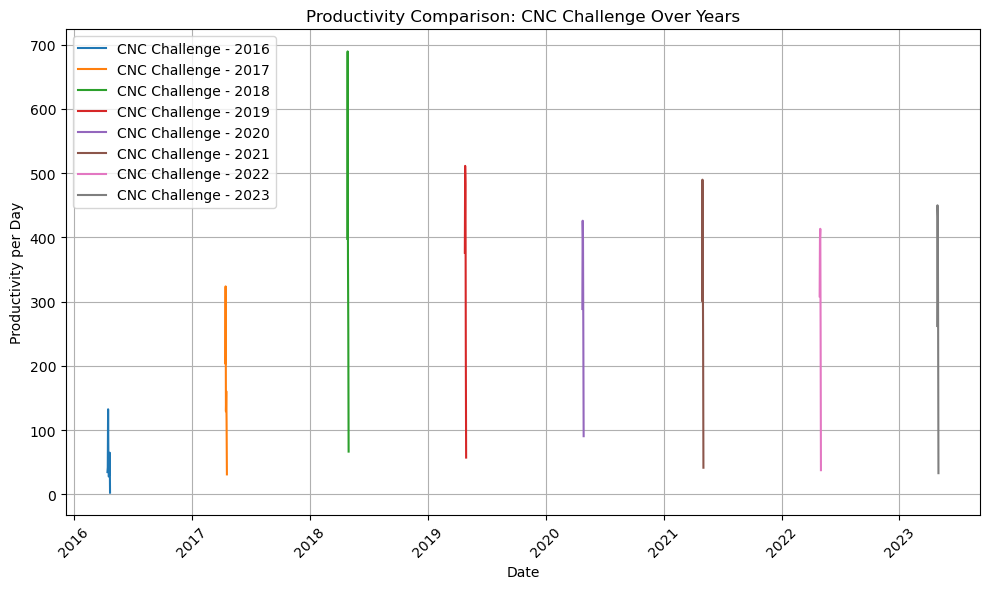

In [63]:
cnc_data = [cnc_2016, cnc_2017, cnc_2018, cnc_2019, cnc_2020, cnc_2021, cnc_2022, cnc_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

plt.figure(figsize=(10, 6))

for i, cnc_df in enumerate(cnc_data):
    cnc_df_copy = cnc_df.copy()  # copy of the DataFrame to avoid SettingWithCopyWarning
    cnc_df_copy['time_observed_at'] = pd.to_datetime(cnc_df_copy['time_observed_at'], utc=True)
    hours_worked_per_day = 24
    cnc_daily_obs_counts = cnc_df_copy.groupby(cnc_df_copy['time_observed_at'].dt.date).size() / hours_worked_per_day

    plt.plot(cnc_daily_obs_counts.index, cnc_daily_obs_counts.values, label=f'CNC Challenge - {years[i]}')

plt.title('Productivity Comparison: CNC Challenge Over Years')
plt.xlabel('Date')
plt.ylabel('Productivity per Day')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/7p/w5myjh6j1wl3m52tqz_3fmww0000gn/T/ipykernel_7411/3503583863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnc_2016.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2016['time_observed_at'], utc=True)
/var/folders/7p/w5myjh6j1wl3m52tqz_3fmww0000gn/T/ipykernel_7411/3503583863.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cnc_2016.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2016['time_observed_at'], utc=True)
/var/folders/7p/w5myjh6j1wl3m52tqz_3fmww0000gn/T/ipykernel_7411/3503583863.py:3: SettingW

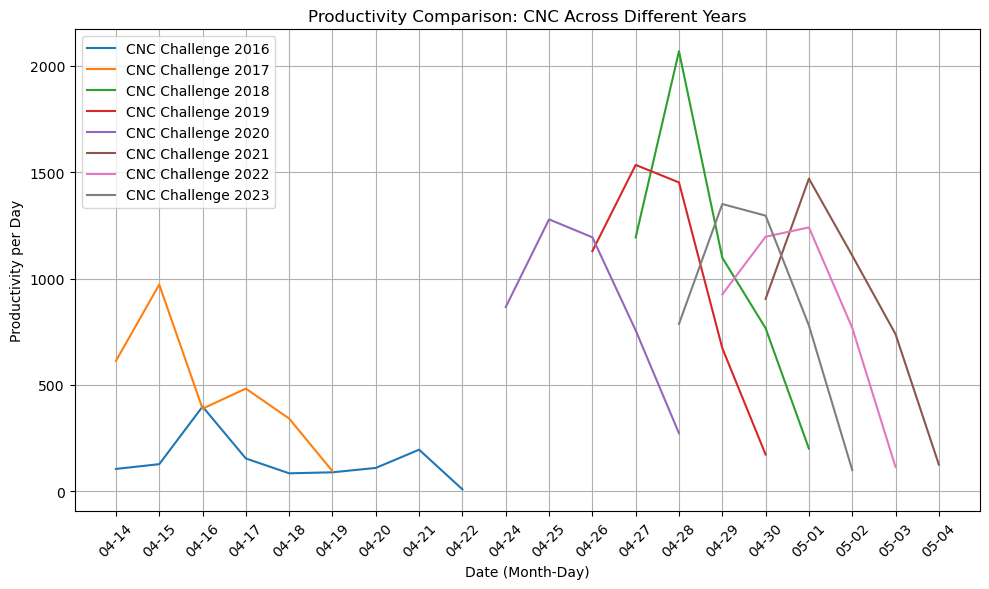

In [64]:
# Convert 'time_observed_at' column to datetime format with UTC timezone 
cnc_2016.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2016['time_observed_at'], utc=True)
cnc_2017.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2017['time_observed_at'], utc=True)
cnc_2018.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2018['time_observed_at'], utc=True)
cnc_2019.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2019['time_observed_at'], utc=True)
cnc_2020.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2020['time_observed_at'], utc=True)
cnc_2021.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2021['time_observed_at'], utc=True)
cnc_2022.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2022['time_observed_at'], utc=True)
cnc_2023.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2023['time_observed_at'], utc=True)


# Calculate productivity per day. I set if for 24h. can be 8 or 24
hours_worked_per_day = 8

# Group data by day for each year and sort by date
cnc_daily_obs_counts_16 = cnc_2016.groupby(cnc_2016['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_17 = cnc_2017.groupby(cnc_2017['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_18 = cnc_2018.groupby(cnc_2018['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_19 = cnc_2019.groupby(cnc_2019['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_20 = cnc_2020.groupby(cnc_2020['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_21 = cnc_2021.groupby(cnc_2021['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_22 = cnc_2022.groupby(cnc_2022['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_23 = cnc_2023.groupby(cnc_2023['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day

# Create an ordered list of dates
ordered_dates = sorted(set(cnc_daily_obs_counts_16.index) | set(cnc_daily_obs_counts_17.index) | set(cnc_daily_obs_counts_18.index) | set(cnc_daily_obs_counts_19.index)| set(cnc_daily_obs_counts_20.index)|set(cnc_daily_obs_counts_21.index)|set(cnc_daily_obs_counts_22.index)|set(cnc_daily_obs_counts_23.index))

# Create NaN Series for missing dates and reindex
cnc_daily_obs_counts_16 = cnc_daily_obs_counts_16.reindex(ordered_dates, fill_value=pd.NA)
cnc_daily_obs_counts_17 = cnc_daily_obs_counts_17.reindex(ordered_dates, fill_value=pd.NA)
cnc_daily_obs_counts_18 = cnc_daily_obs_counts_18.reindex(ordered_dates, fill_value=pd.NA)
cnc_daily_obs_counts_19 = cnc_daily_obs_counts_19.reindex(ordered_dates, fill_value=pd.NA)
cnc_daily_obs_counts_20 = cnc_daily_obs_counts_20.reindex(ordered_dates, fill_value=pd.NA)
cnc_daily_obs_counts_21 = cnc_daily_obs_counts_21.reindex(ordered_dates, fill_value=pd.NA)
cnc_daily_obs_counts_22 = cnc_daily_obs_counts_22.reindex(ordered_dates, fill_value=pd.NA)
cnc_daily_obs_counts_23 = cnc_daily_obs_counts_23.reindex(ordered_dates, fill_value=pd.NA)


plt.figure(figsize=(10, 6))

# Plotting each year's productivity 
plt.plot(cnc_daily_obs_counts_16.index, cnc_daily_obs_counts_16.values, label='CNC Challenge 2016')
plt.plot(cnc_daily_obs_counts_17.index, cnc_daily_obs_counts_17.values, label='CNC Challenge 2017')
plt.plot(cnc_daily_obs_counts_18.index, cnc_daily_obs_counts_18.values, label='CNC Challenge 2018')
plt.plot(cnc_daily_obs_counts_19.index, cnc_daily_obs_counts_19.values, label='CNC Challenge 2019')
plt.plot(cnc_daily_obs_counts_20.index, cnc_daily_obs_counts_20.values, label='CNC Challenge 2020')
plt.plot(cnc_daily_obs_counts_21.index, cnc_daily_obs_counts_21.values, label='CNC Challenge 2021')
plt.plot(cnc_daily_obs_counts_22.index, cnc_daily_obs_counts_22.values, label='CNC Challenge 2022')
plt.plot(cnc_daily_obs_counts_23.index, cnc_daily_obs_counts_23.values, label='CNC Challenge 2023')



plt.title('Productivity Comparison: CNC Across Different Years')
plt.xlabel('Date (Month-Day)')
plt.ylabel('Productivity per Day')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
def calculate_days_relative_to_start(df, datetime_column_name='time_observed_at'):
    """
    This function calculates dates to days with weekend or weekday.
    """
    # Minimum timestamp in the column
    start_date = df[datetime_column_name].min().replace(hour=0, minute=0, second=0, microsecond=0)
    
    # Number of days relative to the start date, calculating the days in int and adding 1 to start from 1
    days_relative_to_start = (df[datetime_column_name] - start_date).dt.days + 1
    
    # Is the date a weekend (Saturday or Sunday)
    is_weekend = df[datetime_column_name].dt.dayofweek.isin([5, 6])
    
    # Resetting the index to avoid any potential MultiIndex issues
    df = df.reset_index(drop=True)
    
    # Assign method to add new columns to the DataFrame without modifying the DataFrame
    df = df.assign(days_relative_to_start=days_relative_to_start, is_weekend=is_weekend)
    
    return df




In [79]:
cnc_2016 = calculate_days(cnc_2016)
cnc_2016

id                       observed_on_string observed_on  \
26646     2894672               2016-04-19 12:01:01 PM PDT  2016-04-19   
29778     2932068  Thu Apr 14 2016 02:36:30 GMT-0700 (PDT)  2016-04-14   
29791     2932968  Thu Apr 14 2016 08:00:23 GMT-0700 (PDT)  2016-04-14   
29793     2933005  Thu Apr 14 2016 08:19:26 GMT-0700 (PDT)  2016-04-14   
29794     2933057                      2016-04-14 07:39:36  2016-04-14   
...           ...                                      ...         ...   
140471  164577720                2016-04-21 10:59:52-07:00  2016-04-21   
140472  164579209                2016-04-14 11:02:00-07:00  2016-04-14   
140490  169931940                       2016/04/21 3:16 AM  2016-04-21   
140522  173584505                       2016/04/21 5:47 AM  2016-04-21   
140605  191045745                       2016/04/16 2:05 PM  2016-04-16   

                time_observed_at    created_time_zone  \
26646  2016-04-19 19:01:01+00:00  America/Los_Angeles   
29778  2016-04-14 09:36:30+00:00  America/Los_Angeles   
29791  2016-04-14 15:00:23+00:00  America/Los_Angeles   
29793  2016-04-14 15:19:26+00:00  America/Los_Angeles   
29794  2016-04-14 14:39:36+00:00  America/Los_Angeles   
...                          ...                  ...   
140471 2016-04-21 17:59:52+00:00  America/Los_Angeles   
140472 2016-04-14 18:02:00+00:00  America/Los_Angeles   
140490 2016-04-21 10:16:00+00:00  America/Los_Angeles   
140522 2016-04-21 12:47:00+00:00  America/Los_Angeles   
140605 2016-04-16 21:05:00+00:00  America/Los_Angeles   

                       created_at                 updated_at  \
26646   2016-04-07T10:52:29-07:00  2017-04-12T11:05:00-07:00   
29778   2016-04-14T02:42:12-07:00  2016-04-14T16:16:08-07:00   
29791   2016-04-14T08:00:55-07:00  2023-01-19T06:17:12-08:00   
29793   2016-04-14T08:20:04-07:00  2016-09-22T20:05:40-07:00   
29794   2016-04-14T08:27:35-07:00  2016-06-25T11:25:55-07:00   
...                           ...                        ...   
140471  2023-05-29T21:42:49-07:00  2023-05-29T22:57:57-07:00   
140472  2023-05-29T21:56:10-07:00  2023-05-30T07:00:36-07:00   
140490  2023-06-28T05:39:31-07:00  2023-08-11T20:35:13-07:00   
140522  2023-07-18T05:55:21-07:00  2023-07-22T09:57:10-07:00   
140605  2023-11-14T16:12:09-08:00  2023-11-14T17:28:11-08:00   

                                              description  user_id  \
26646                                                 NaN    28837   
29778                                                 NaN     1213   
29791                                                 NaN   216569   
29793                                                 NaN    70962   
29794                                                 NaN   141551   
...                                                   ...      ...   
140471  Was catch & releasing critters on the Fairfiel...   178449   
140472                                                NaN   178449   
140490  Photographer Chris Scharf - client on Royle Sa...  6249416   
140522  Photographer Chris Scharf - client of Royle Sa...  6249416   
140605                                                NaN   781032   

       quality_grade  ... taxon_parent_id  taxon_native  taxon_endemic  \
26646       research  ...         57854.0          True          False   
29778       research  ...         27422.0          True          False   
29791         casual  ...             NaN           NaN            NaN   
29793         casual  ...          9315.0          True          False   
29794       research  ...          7086.0          True          False   
...              ...  ...             ...           ...            ...   
140471      research  ...         37763.0          True          False   
140472      research  ...         37763.0          True          False   
140490      research  ...         41973.0          True          False   
140522      research  ...       1431401.0          True          False   
140605      resea

In [65]:
def calculate_days(df):
    """
    This function is to calculte the dates to days 
    """
    #minimum timestamp in the column
    start_date = df['time_observed_at'].min().replace(hour=0, minute=0, second=0, microsecond=0)
    # number of days relative to start date, calculating the days in int and adding 1 to start from 1
    days_relative_to_start = (df['time_observed_at'] - start_date).dt.days + 1
    
    #assign method to add a new column to the Df without modifying the df
    df = df.assign(days_relative_to_start=days_relative_to_start)
    return df


In [ ]:
# Function to calculate days relative to the start of the year's event
def calculate_days_relative_to_start(df):
    start_date = df['time_observed_at'].min().replace(hour=0, minute=0, second=0, microsecond=0)
    df.loc[:, 'days_relative_to_start'] = (df['time_observed_at'] - start_date).dt.days + 1
    return df


In [ ]:
def plot_year_trend(cnc_daily_obs_counts, label, color):
    plt.plot(cnc_daily_obs_counts.index, cnc_daily_obs_counts.values, label=label)
    trend_line = np.polyfit(cnc_daily_obs_counts.index, cnc_daily_obs_counts.values, 1)
    plt.plot(cnc_daily_obs_counts.index, np.polyval(trend_line, cnc_daily_obs_counts.index), linestyle='dashed', color=color, label=f'Trend {label}')


                time_observed_at  days_relative_to_start
26646  2016-04-19 19:01:01+00:00                     6.0
29778  2016-04-14 09:36:30+00:00                     1.0
29791  2016-04-14 15:00:23+00:00                     1.0
29793  2016-04-14 15:19:26+00:00                     1.0
29794  2016-04-14 14:39:36+00:00                     1.0
...                          ...                     ...
140471 2016-04-21 17:59:52+00:00                     8.0
140472 2016-04-14 18:02:00+00:00                     1.0
140490 2016-04-21 10:16:00+00:00                     8.0
140522 2016-04-21 12:47:00+00:00                     8.0
140605 2016-04-16 21:05:00+00:00                     3.0

[11357 rows x 2 columns]


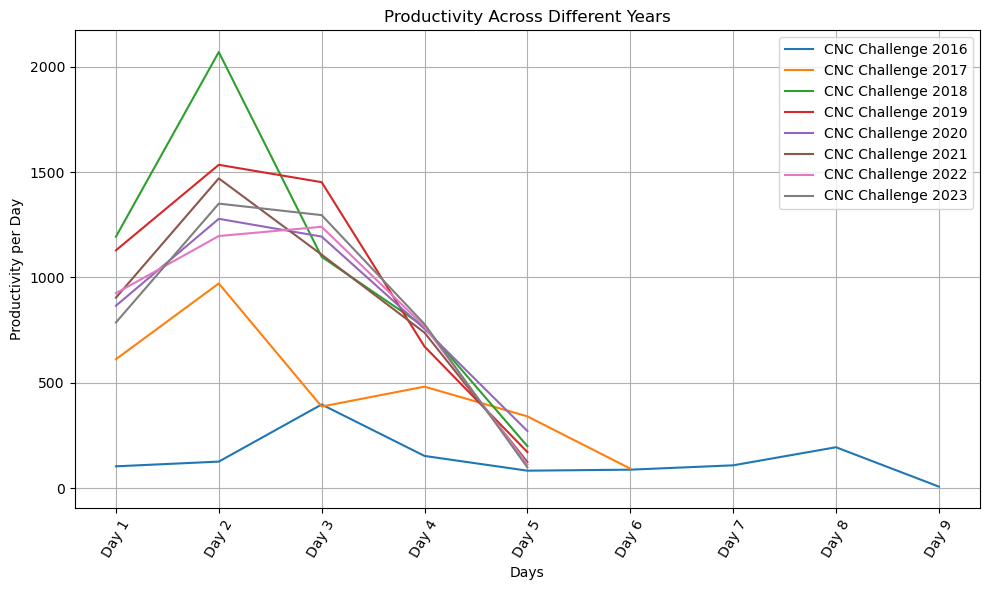

In [245]:
#just the days 

# Apply the function to each year's DataFrame
cnc_2016 = calculate_days(cnc_2016)
print(cnc_2016[['time_observed_at', 'days_relative_to_start']])
cnc_2017 = calculate_days(cnc_2017)
#print(cnc_2017[['time_observed_at', 'days_relative_to_start']])
cnc_2018 = calculate_days(cnc_2018)
cnc_2019 = calculate_days(cnc_2019)
cnc_2020 = calculate_days(cnc_2020)
cnc_2021 = calculate_days(cnc_2021)
cnc_2022 = calculate_days(cnc_2022)
cnc_2023 = calculate_days(cnc_2023)



# Calculate productivity per day. I set it for 24h, but it can be 8 or 24
hours_worked_per_day = 8

# Group data by days relative to the start and sort by date
cnc_daily_obs_counts_16 = cnc_2016.groupby('days_relative_to_start').size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_17 = cnc_2017.groupby('days_relative_to_start').size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_18 = cnc_2018.groupby('days_relative_to_start').size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_19 = cnc_2019.groupby('days_relative_to_start').size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_20 = cnc_2020.groupby('days_relative_to_start').size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_21 = cnc_2021.groupby('days_relative_to_start').size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_22 = cnc_2022.groupby('days_relative_to_start').size().sort_index() / hours_worked_per_day
cnc_daily_obs_counts_23 = cnc_2023.groupby('days_relative_to_start').size().sort_index() / hours_worked_per_day

# Create an ordered list of days relative to the start
ordered_days = sorted(set(cnc_daily_obs_counts_16.index) | set(cnc_daily_obs_counts_17.index) | set(cnc_daily_obs_counts_18.index) | set(cnc_daily_obs_counts_19.index) | set(cnc_daily_obs_counts_20.index) | set(cnc_daily_obs_counts_21.index) | set(cnc_daily_obs_counts_22.index) | set(cnc_daily_obs_counts_23.index))

# Create NaN Series for missing days and reindex
cnc_daily_obs_counts_16 = cnc_daily_obs_counts_16.reindex(ordered_days, fill_value=pd.NA)
cnc_daily_obs_counts_17 = cnc_daily_obs_counts_17.reindex(ordered_days, fill_value=pd.NA)
cnc_daily_obs_counts_18 = cnc_daily_obs_counts_18.reindex(ordered_days, fill_value=pd.NA)
cnc_daily_obs_counts_19 = cnc_daily_obs_counts_19.reindex(ordered_days, fill_value=pd.NA)
cnc_daily_obs_counts_20 = cnc_daily_obs_counts_20.reindex(ordered_days, fill_value=pd.NA)
cnc_daily_obs_counts_21 = cnc_daily_obs_counts_21.reindex(ordered_days, fill_value=pd.NA)
cnc_daily_obs_counts_22 = cnc_daily_obs_counts_22.reindex(ordered_days, fill_value=pd.NA)
cnc_daily_obs_counts_23 = cnc_daily_obs_counts_23.reindex(ordered_days, fill_value=pd.NA)

plt.figure(figsize=(10, 6))

# Plotting each year's productivity
plt.plot(cnc_daily_obs_counts_16.index, cnc_daily_obs_counts_16.values, label='CNC Challenge 2016')
plt.plot(cnc_daily_obs_counts_17.index, cnc_daily_obs_counts_17.values, label='CNC Challenge 2017')
plt.plot(cnc_daily_obs_counts_18.index, cnc_daily_obs_counts_18.values, label='CNC Challenge 2018')
plt.plot(cnc_daily_obs_counts_19.index, cnc_daily_obs_counts_19.values, label='CNC Challenge 2019')
plt.plot(cnc_daily_obs_counts_20.index, cnc_daily_obs_counts_20.values, label='CNC Challenge 2020')
plt.plot(cnc_daily_obs_counts_21.index, cnc_daily_obs_counts_21.values, label='CNC Challenge 2021')
plt.plot(cnc_daily_obs_counts_22.index, cnc_daily_obs_counts_22.values, label='CNC Challenge 2022')
plt.plot(cnc_daily_obs_counts_23.index, cnc_daily_obs_counts_23.values, label='CNC Challenge 2023')

# Set x-axis ticks and labels without decimals
plt.xticks(ordered_days, ['Day {}'.format(int(day)) for day in ordered_days])
        
# ...
plt.title('Productivity Across Different Years')
plt.xlabel('Days')
plt.ylabel('Productivity per Day')
plt.legend()
plt.grid(True)

# Set x-axis ticks and labels without decimals
plt.xticks(ordered_days, ['Day {}'.format(int(day)) for day in ordered_days])

# Rotate x-axis labels vertically
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


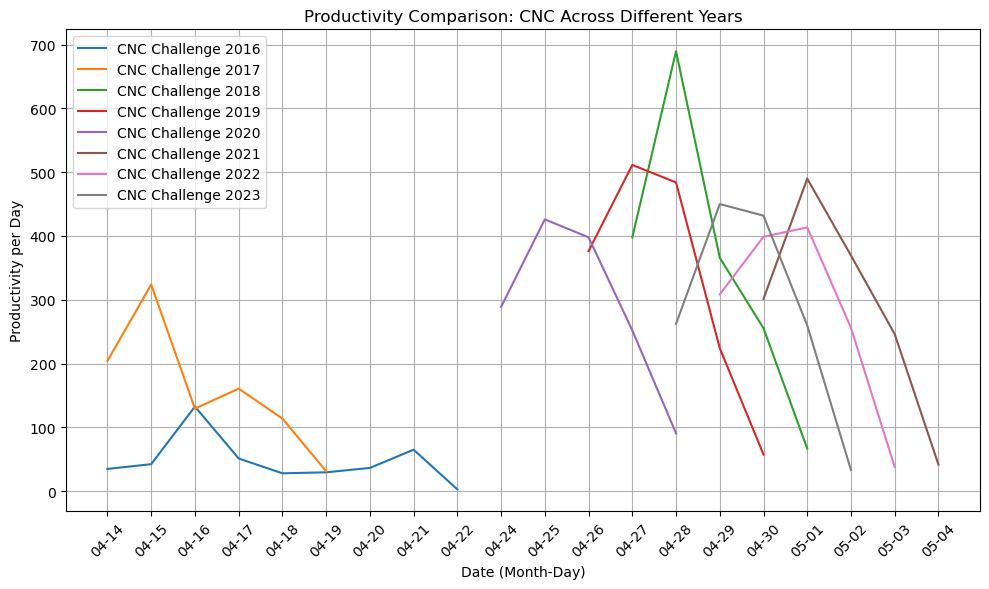

In [81]:
#method 2 - efficient to do this way than plotting one by one
'''
 uses loops to iterate through the list of dataframes, 
 calculate daily observation counts for each year, and store them in a dictionary.
'''

cnc_dataframes = [cnc_2016, cnc_2017, cnc_2018, cnc_2019,cnc_2020,cnc_2021,cnc_2022,cnc_2023]  # Update this list with your dataframes

# Convert 'time_observed_at' column to datetime format with UTC timezone for all dataframes
for df in cnc_dataframes:
    df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)

# Calculate productivity per day for CNC events (assuming 8 working hours)
hours_worked_per_day = 24

# empty dictionary to store daily observation counts for each year
cnc_daily_obs_counts = {}

# Iterate through each dataframe to calculate daily observation counts
for i, df in enumerate(cnc_dataframes, start=2016):
    daily_obs_counts = df.groupby(df['time_observed_at'].dt.strftime('%m-%d')).size().sort_index() / hours_worked_per_day
    # Reindex to ordered_dates and fill missing values with NaN
    cnc_daily_obs_counts[f'CNC Challenge {i}'] = daily_obs_counts.reindex(ordered_dates, fill_value=pd.NA)

# ordered list of dates for consitency 
ordered_dates = sorted(set().union(*(df.index for df in cnc_daily_obs_counts.values())))


plt.figure(figsize=(10, 6))

# Plotting each year's productivity data 
for label, data in cnc_daily_obs_counts.items():
    plt.plot(data.index, data.values, label=label)

plt.title('Productivity Comparison: CNC Across Different Years')
plt.xlabel('Date (Month-Day)')
plt.ylabel('Productivity per Day')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# Convert 'time_observed_at' column to datetime format with UTC timezone for CNC DataFrame
#cnc_2016.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2016['time_observed_at'], utc=True)
#cnc_2017.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2017['time_observed_at'], utc=True)
cnc_2018.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2018['time_observed_at'], utc=True)
#cnc_2019.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2019['time_observed_at'], utc=True)

# Convert 'time_observed_at' column to datetime format with UTC timezone for non-CNC DataFrame
#non_cnc_2016.loc[:, 'time_observed_at'] = pd.to_datetime(non_cnc_2016['time_observed_at'], utc=True)


# Calculate productivity per day for CNC and non-CNC events (assuming 8 working hours)
hours_worked_per_day = 8
#cnc_daily_obs_counts_16 = cnc_2016.groupby(cnc_2016['time_observed_at'].dt.date).size() / hours_worked_per_day
#cnc_daily_obs_counts_17 = cnc_2017.groupby(cnc_2017['time_observed_at'].dt.date).size() / hours_worked_per_day
cnc_daily_obs_counts_18 = cnc_2018.groupby(cnc_2018['time_observed_at'].dt.date).size() / hours_worked_per_day
#cnc_daily_obs_counts_19 = cnc_2016.groupby(cnc_2019['time_observed_at'].dt.date).size() / hours_worked_per_day
#cnc_daily_obs_counts = cnc_2016.groupby(cnc_2016['time_observed_at'].dt.date).size() / hours_worked_per_day

#non_cnc_daily_obs_counts = non_cnc_2016.groupby(non_cnc_2016['time_observed_at'].dt.date).size() / hours_worked_per_day

# Plotting
plt.figure(figsize=(10, 6))

#plt.plot(cnc_daily_obs_counts_16.index, cnc_daily_obs_counts_16.values, label='CNC Challenge')
#plt.plot(cnc_daily_obs_counts_17.index, cnc_daily_obs_counts_17.values, label='CNC Challenge')
plt.plot(cnc_daily_obs_counts_18.index, cnc_daily_obs_counts_18.values, label='CNC Challenge')
#plt.plot(cnc_daily_obs_counts_19.index, cnc_daily_obs_counts_19.values, label='CNC Challenge')

#plt.plot(non_cnc_daily_obs_counts.index, non_cnc_daily_obs_counts.values, label='Non-CNC Days')

plt.title('Productivity Comparison: CNC Challenge vs Non-CNC Days')
plt.xlabel('Date')
plt.ylabel('Productivity per Day')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#cnc_2016['time_observed_at'] = pd.to_datetime(cnc_2016['time_observed_at'], utc=True)
#non_cnc_2016['time_observed_at'] = pd.to_datetime(non_cnc_2016['time_observed_at'], utc=True)


# Convert 'time_observed_at' column to datetime format with UTC timezone for CNC DataFrame
cnc_2016.loc[:, 'time_observed_at'] = pd.to_datetime(cnc_2016['time_observed_at'], utc=True)

# Convert 'time_observed_at' column to datetime format with UTC timezone for non-CNC DataFrame
non_cnc_2016.loc[:, 'time_observed_at'] = pd.to_datetime(non_cnc_2016['time_observed_at'], utc=True)


# Calculate productivity per day for CNC and non-CNC events (assuming 8 working hours)
hours_worked_per_day = 24
cnc_daily_obs_counts = cnc_2016.groupby(cnc_2016['time_observed_at'].dt.date).size() / hours_worked_per_day
non_cnc_daily_obs_counts = non_cnc_2016.groupby(non_cnc_2016['time_observed_at'].dt.date).size() / hours_worked_per_day

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(cnc_daily_obs_counts.index, cnc_daily_obs_counts.values, label='CNC Challenge')
#plt.plot(non_cnc_daily_obs_counts.index, non_cnc_daily_obs_counts.values, label='Non-CNC Days')

plt.title('Productivity Comparison: CNC Challenge vs Non-CNC Days')
plt.xlabel('Date')
plt.ylabel('Productivity per Day')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))

#plt.plot(cnc_daily_obs_counts.index, cnc_daily_obs_counts.values, label='CNC Challenge')
plt.plot(non_cnc_daily_obs_counts.index, non_cnc_daily_obs_counts.values, label='Non-CNC Days')

plt.title('Productivity Comparison: CNC Challenge vs Non-CNC Days')
plt.xlabel('Date')
plt.ylabel('Productivity per Day')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'time_observed_at' column contains timezone-aware datetime objects
cnc_all['time_observed_at'] = pd.to_datetime(cnc_all['time_observed_at'], utc=True)
non_cnc_all['time_observed_at'] = pd.to_datetime(non_cnc_all['time_observed_at'], utc=True)

# Calculate productivity per day for CNC and non-CNC events (assuming 8 working hours)
hours_worked_per_day = 24
cnc_daily_obs_counts = cnc_all.groupby(cnc_all['time_observed_at'].dt.date).size() / hours_worked_per_day
non_cnc_daily_obs_counts = non_cnc_all.groupby(non_cnc_all['time_observed_at'].dt.date).size() / hours_worked_per_day

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(cnc_daily_obs_counts.index, cnc_daily_obs_counts.values, label='CNC Challenge')
plt.plot(non_cnc_daily_obs_counts.index, non_cnc_daily_obs_counts.values, label='Non-CNC Days')

plt.title('Productivity Comparison: CNC Challenge vs Non-CNC Days')
plt.xlabel('Date')
plt.ylabel('Productivity per Day')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:

# Calculate total count for each year
cnc_counts = [cnc_2016.shape[0], cnc_2017.shape[0],cnc_2018.shape[0], cnc_2019.shape[0],cnc_2020.shape[0],cnc_2021.shape[0],cnc_2022.shape[0],cnc_2023.shape[0]]
non_cnc_counts  = [non_cnc_2016.shape[0], non_cnc_2017.shape[0],non_cnc_2018.shape[0], non_cnc_2019.shape[0],non_cnc_2020.shape[0],non_cnc_2021.shape[0],non_cnc_2022.shape[0],non_cnc_2023.shape[0]]

years = [2016, 2017, 2018, 2019,2020,2021,2022,2023]


plt.figure(figsize=(6, 4))
plt.plot(years, cnc_counts, marker='o', linestyle='-', label='CNC', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Total CNC Count')
plt.xticks(years)
plt.legend()
#plt.grid(True)
plt.show()

# Plotting non-CNC counts 
plt.figure(figsize=(6, 4))
plt.plot(years, non_cnc_counts, marker='o', linestyle='-', label='Non-CNC', color='green')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Total Non-CNC Count')
plt.xticks(years)
plt.legend()
#plt.grid(True)
plt.show()

In [246]:
u_obs_cnc = cnc_all['user_id'].unique()
print('Unique users during CNC:',u_obs_cnc.shape[0])



Unique users during CNC: 12592


In [247]:
u_obs_non_cnc = non_cnc_all['user_id'].unique()
print('Unique users outside CNC:',u_obs_non_cnc.shape[0])



Unique users outside CNC: 114663


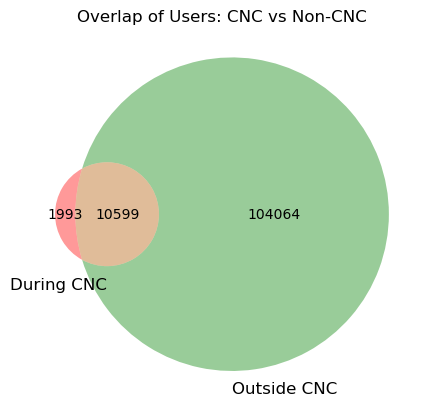

In [248]:
venn2([set(u_obs_cnc), set(u_obs_non_cnc)], ('During CNC', 'Outside CNC'))

plt.title('Overlap of Users: CNC vs Non-CNC')
plt.show()

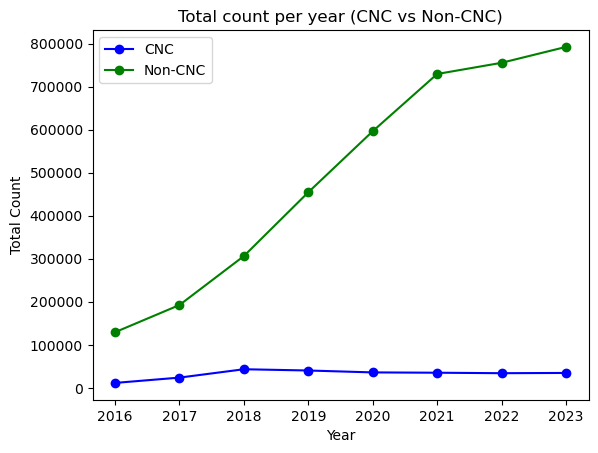

In [249]:
import matplotlib.pyplot as plt


cnc_counts = [cnc_2016.shape[0], cnc_2017.shape[0],cnc_2018.shape[0], cnc_2019.shape[0],cnc_2020.shape[0],cnc_2021.shape[0],cnc_2022.shape[0],cnc_2023.shape[0]]
non_cnc_counts  = [non_cnc_2016.shape[0], non_cnc_2017.shape[0],non_cnc_2018.shape[0], non_cnc_2019.shape[0],non_cnc_2020.shape[0],non_cnc_2021.shape[0],non_cnc_2022.shape[0],non_cnc_2023.shape[0]]

years = [2016, 2017, 2018, 2019,2020,2021,2022,2023]


# Plotting CNC and non-CNC counts in the same figure with different colors
plt.plot(years, cnc_counts, marker='o', linestyle='-', label='CNC', color='blue')
plt.plot(years, non_cnc_counts, marker='o', linestyle='-', label='Non-CNC', color='green')

plt.xlabel('Year')
plt.ylabel('Total Count')
plt.title('Total count per year (CNC vs Non-CNC)')
plt.xticks(years)  # Set x-axis ticks explicitly to show only specified years
plt.legend()
#plt.grid(True)
plt.show()

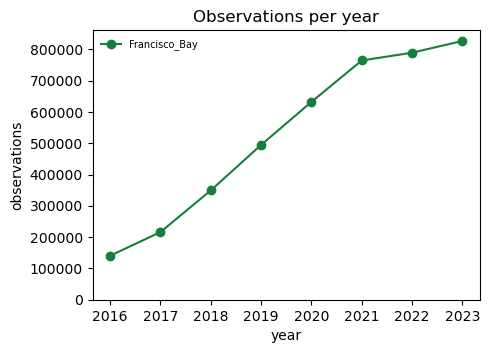

In [250]:
fig = plt.figure(figsize=(5,3.5))
for city, dfyears in dfs.items():
    x=[]; y=[];
    for year, df in dfyears.items():
        x.append(year)
        y.append(len(df))
    plt.plot(x, y, '-o', label=city, color=cities_colors[city][-1])
from matplotlib.ticker import MultipleLocator
plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.xlabel("year")
plt.ylabel("observations")
plt.title("Observations per year")
plt.legend(frameon=False, fontsize=7, loc='upper left')

plt.ylim(ymin=0)
plt.show()

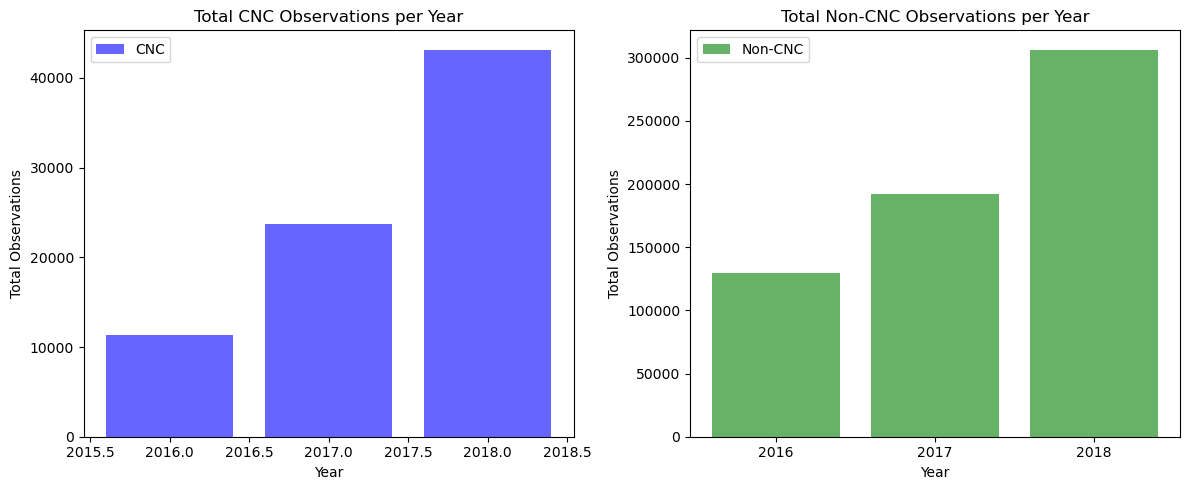

In [251]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # Creating a 1x2 grid for subplots

cnc_dfs = [cnc_2016, cnc_2017, cnc_2018]
non_cnc_dfs = [non_cnc_2016, non_cnc_2017, non_cnc_2018]
years = [2016, 2017, 2018]

# Calculate total count of observations for CNC and non-CNC per year
cnc_counts = [cnc_df['observed_on'].count() for cnc_df in cnc_dfs]
non_cnc_counts = [non_cnc_df['observed_on'].count() for non_cnc_df in non_cnc_dfs]

# Plotting total counts for CNC and non-CNC observations
axes[0].bar(years, cnc_counts, label='CNC', color='blue', alpha=0.6)
axes[0].set_title('Total CNC Observations per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Observations')
axes[0].legend()
plt.xticks(years)  # Set x-axis ticks explicitly to show only specified years

axes[1].bar(years, non_cnc_counts, label='Non-CNC', color='green', alpha=0.6)
axes[1].set_title('Total Non-CNC Observations per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Total Observations')
axes[1].legend()
plt.xticks(years)  # Set x-axis ticks explicitly to show only specified years


plt.tight_layout()
plt.show()

# Observation and Identification made by users

In [252]:
def get_obs_ident_per_users(dfcity):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | n_obs | n_idents
    """
    
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)
    
    for _, row in dfcity.iterrows():
        # Total count of observation made by each users
        user_obs = row['user_id']
        n_obs[user_obs] += 1 # Increment observation count for the user
        
        # Total identification user made
        identifications = row['identifications']
        if not pd.isnull(identifications):  # Check if 'identifications' is not NaN
            identifications = eval(identifications)
            for ident in identifications:
                user_ident = ident['user_id']
                if user_ident != user_obs:
                    n_idents[user_ident] += 1 # Increment identification count for the user
    
    # Aggregating results into a list of dictionaries
    obs_ident_list = []
    for user_id, obs_count in n_obs.items():
        obs_ident_list.append({
            'user_id': user_id,
            'n_obs': obs_count,
            'n_idents': n_idents[user_id]
        })
    
    # Create DataFrame from the list of dictionaries
    
    dfobsident = pd.DataFrame(obs_ident_list)
    
    return dfobsident


In [299]:
def get_obs_ident_per_users(dfcity, year):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
     - year: int
         The year corresponding to the observations data.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | year | n_obs | n_idents
    """
    
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)
    
    for _, row in dfcity.iterrows():
        # Total count of observation made by each users
        user_obs = row['user_id']
        n_obs[user_obs] += 1 # Increment observation count for the user
        
        # Total identification user made
        identifications = row['identifications']
        if not pd.isnull(identifications):  # Check if 'identifications' is not NaN
            identifications = eval(identifications)
            for ident in identifications:
                user_ident = ident['user_id']
                if user_ident != user_obs:
                    n_idents[user_ident] += 1 # Increment identification count for the user
    
    # Aggregating results into a list of dictionaries
    obs_ident_list = []
    for user_id, obs_count in n_obs.items():
        obs_ident_list.append({
            'user_id': user_id,
            'n_obs': obs_count,
            'n_idents': n_idents[user_id],
            'day_type': row['day_type'],  # Include the 'day_type' column in the result
            'year': year
        })
    
    # Create DataFrame from the list of dictionaries
    dfobsident = pd.DataFrame(obs_ident_list)
    
    return dfobsident


## Observation and Identification made during each city nature challenge 

In [259]:
cnc_obs_iden_2016 = get_obs_ident_per_users(cnc_2016,2016)
cnc_obs_iden_2017 = get_obs_ident_per_users(cnc_2017,2017)
cnc_obs_iden_2018 = get_obs_ident_per_users(cnc_2018,2018)
cnc_obs_iden_2019 = get_obs_ident_per_users(cnc_2019,2019)
cnc_obs_iden_2020 = get_obs_ident_per_users(cnc_2020,2020)
cnc_obs_iden_2021 = get_obs_ident_per_users(cnc_2021,2021)
cnc_obs_iden_2022 = get_obs_ident_per_users(cnc_2022,2022)
cnc_obs_iden_2023 = get_obs_ident_per_users(cnc_2023,2023)

#cnc_a = get_obs_ident_per_users(cnc_all)


In [260]:
cnc_obs_iden_2016.head()

user_id  n_obs  n_idents day_type  year
0    28837     21        23  Weekend  2016
1     1213     38        20  Weekend  2016
2   216569      1         0  Weekend  2016
3    70962      5         0  Weekend  2016
4   141551     58        19  Weekend  2016

In [261]:
#Method 2 - better to use this 
list_of_dataframes = [cnc_2016, cnc_2017, cnc_2018, cnc_2019, cnc_2020,cnc_2021,cnc_2022,cnc_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

# Store results in a dictionary
results_by_year = {}

for i, df in enumerate(list_of_dataframes):
    year = years[i]
    results_by_year[year] = get_obs_ident_per_users(df, year)


In [262]:
results_by_year[2023]

user_id  n_obs  n_idents day_type  year
0     1710063      1         0  Weekend  2023
1     6778036     95         0  Weekend  2023
2     2442028    238        68  Weekend  2023
3     6286714      1         0  Weekend  2023
4     1088159      3         0  Weekend  2023
...       ...    ...       ...      ...   ...
2972   208200      4         0  Weekend  2023
2973  7356232      1         0  Weekend  2023
2974  7258958      1         0  Weekend  2023
2975  3247678      3         0  Weekend  2023
2976  1677403      1         0  Weekend  2023

[2977 rows x 5 columns]

In [263]:
# or this method
results_by_year = {years[i]: get_obs_ident_per_users(df, years[i]) for i, df in enumerate(list_of_dataframes)}

In [264]:
results_by_year
combined_cnc_df = pd.concat(results_by_year.values(), ignore_index=True)
combined_cnc_df

user_id  n_obs  n_idents day_type  year
0        28837     21        23  Weekend  2016
1         1213     38        20  Weekend  2016
2       216569      1         0  Weekend  2016
3        70962      5         0  Weekend  2016
4       141551     58        19  Weekend  2016
...        ...    ...       ...      ...   ...
16903   208200      4         0  Weekend  2023
16904  7356232      1         0  Weekend  2023
16905  7258958      1         0  Weekend  2023
16906  3247678      3         0  Weekend  2023
16907  1677403      1         0  Weekend  2023

[16908 rows x 5 columns]

In [ ]:

# Pivot the DataFrame
pivot_df = combined_cnc_df.pivot_table(index='user_id', columns='year', values=['n_obs'], fill_value=0)

# Flatten the MultiIndex columns
pivot_df.columns = ['{}_{}'.format(col[0], col[1]) for col in pivot_df.columns]

# Reset index to make 'user_id' a column instead of the index
pivot_df.reset_index(inplace=True)
pivot_df.sort_values(by ='n_obs_2016', ascending=False)




In [265]:
cnc_obs_iden_2016

user_id  n_obs  n_idents day_type  year
0      28837     21        23  Weekend  2016
1       1213     38        20  Weekend  2016
2     216569      1         0  Weekend  2016
3      70962      5         0  Weekend  2016
4     141551     58        19  Weekend  2016
..       ...    ...       ...      ...   ...
660  2642540      3         0  Weekend  2016
661   388913      1         0  Weekend  2016
662      536      3         0  Weekend  2016
663  2591686      9         0  Weekend  2016
664  6249416      2         0  Weekend  2016

[665 rows x 5 columns]

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

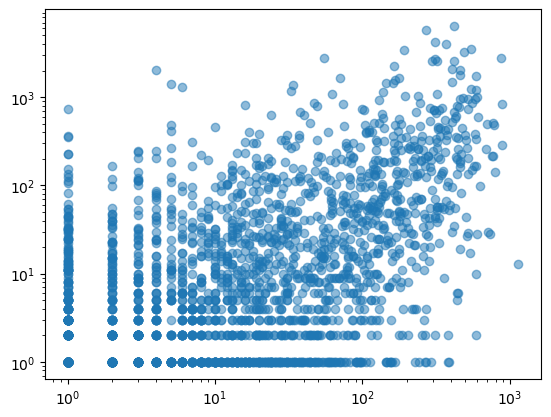

In [386]:
alpha_value = 0.5


plt.scatter(combined_cnc_df['n_obs'], combined_cnc_df['n_idents'],alpha=alpha_value)
#log for both axis 
plt.xscale('log')
plt.yscale('log')

#plt.axhline(y=np.nanmean(cnc_a.n_obs))
#plt.gca().set_xlim(xmin=0.5)
#plt.gca().set_ylim(ymin=0.5)

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(combined_cnc_df['n_obs'], combined_cnc_df['n_idents'], 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)


plt.title("observation vs identification - San Fransisco 2016-2020", pad=20)
plt.xlabel("n_observations")
plt.ylabel("n_identifications")
plt.show()


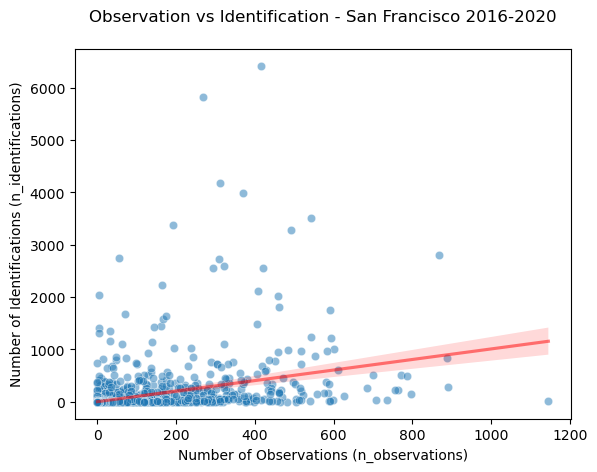

In [375]:


# Scatter plot with transparency
sns.scatterplot(x='n_obs', y='n_idents', data=combined_cnc_df, alpha=0.5)

# Logarithmic scales for both axes
#plt.xscale('log')
#plt.yscale('log')

# Regression line using Seaborn
sns.regplot(x='n_obs', y='n_idents', data=combined_cnc_df, scatter=False, color='red', line_kws={'alpha': 0.5})

# Title and axis labels
plt.title("Observation vs Identification - San Francisco 2016-2020", pad=20)
plt.xlabel("Number of Observations (n_observations)")
plt.ylabel("Number of Identifications (n_identifications)")

# Show the plot
plt.show()


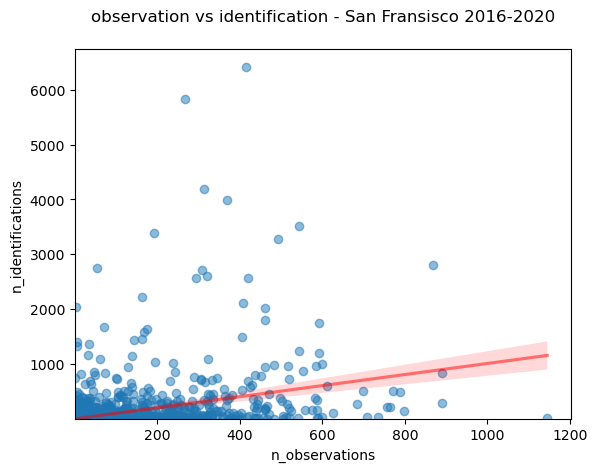

In [387]:
alpha_value = 0.5
plt.scatter(combined_cnc_df['n_obs'], combined_cnc_df['n_idents'],alpha=alpha_value)
#log for both axis 
#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=np.nanmean(cnc_a.n_obs))
plt.gca().set_xlim(xmin=0.5)
plt.gca().set_ylim(ymin=0.5)

# Regression line
sns.regplot(x='n_obs', y='n_idents', data=combined_cnc_df, scatter=False, color='red', line_kws={'alpha': alpha_value})

plt.title("observation vs identification - San Fransisco 2016-2020", pad=20)
plt.xlabel("n_observations")
plt.ylabel("n_identifications")
plt.show()



In [ ]:
alpha_value = 0.5
plt.scatter(combined_cnc_df['n_obs'], combined_cnc_df['n_idents'],alpha=alpha_value)
#log for both axis 
#plt.xscale('log')
#plt.yscale('log')

#plt.axhline(y=np.nanmean(cnc_a.n_obs))
plt.gca().set_xlim(xmin=0.5)
plt.gca().set_ylim(ymin=0.5)

# Regression line
sns.regplot(x='n_obs', y='n_idents', data=combined_cnc_df, scatter=False, color='red', line_kws={'alpha': alpha_value})

plt.title("observation vs identification - San Fransisco 2016-2020", pad=20)
plt.xlabel("n_observations")
plt.ylabel("n_identifications")
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

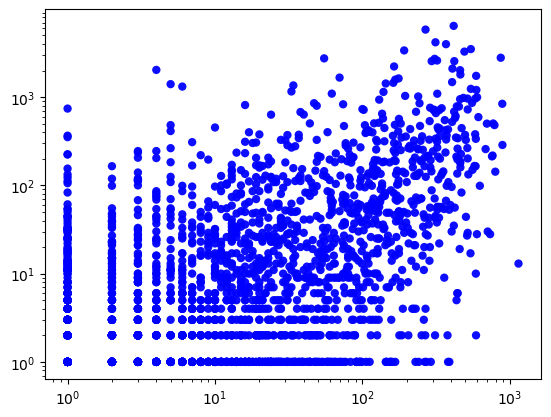

In [398]:
fig = plt.figure()
ax=plt.gca() 
ax.scatter(combined_cnc_df['n_obs'], combined_cnc_df['n_idents'],c="blue",alpha=0.95,edgecolors='none', label='data')
ax.set_yscale('log')
ax.set_xscale('log')


newX = np.logspace(0, 3, base=10)  # Makes a nice domain for the fitted curves.
                                   # Goes from 10^0 to 10^3
                                   # This avoids the sorting and the swarm of lines.

# Let's fit an exponential function.  
# This looks like a line on a lof-log plot.
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, x, y, maxfev=1000)
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))
print ("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

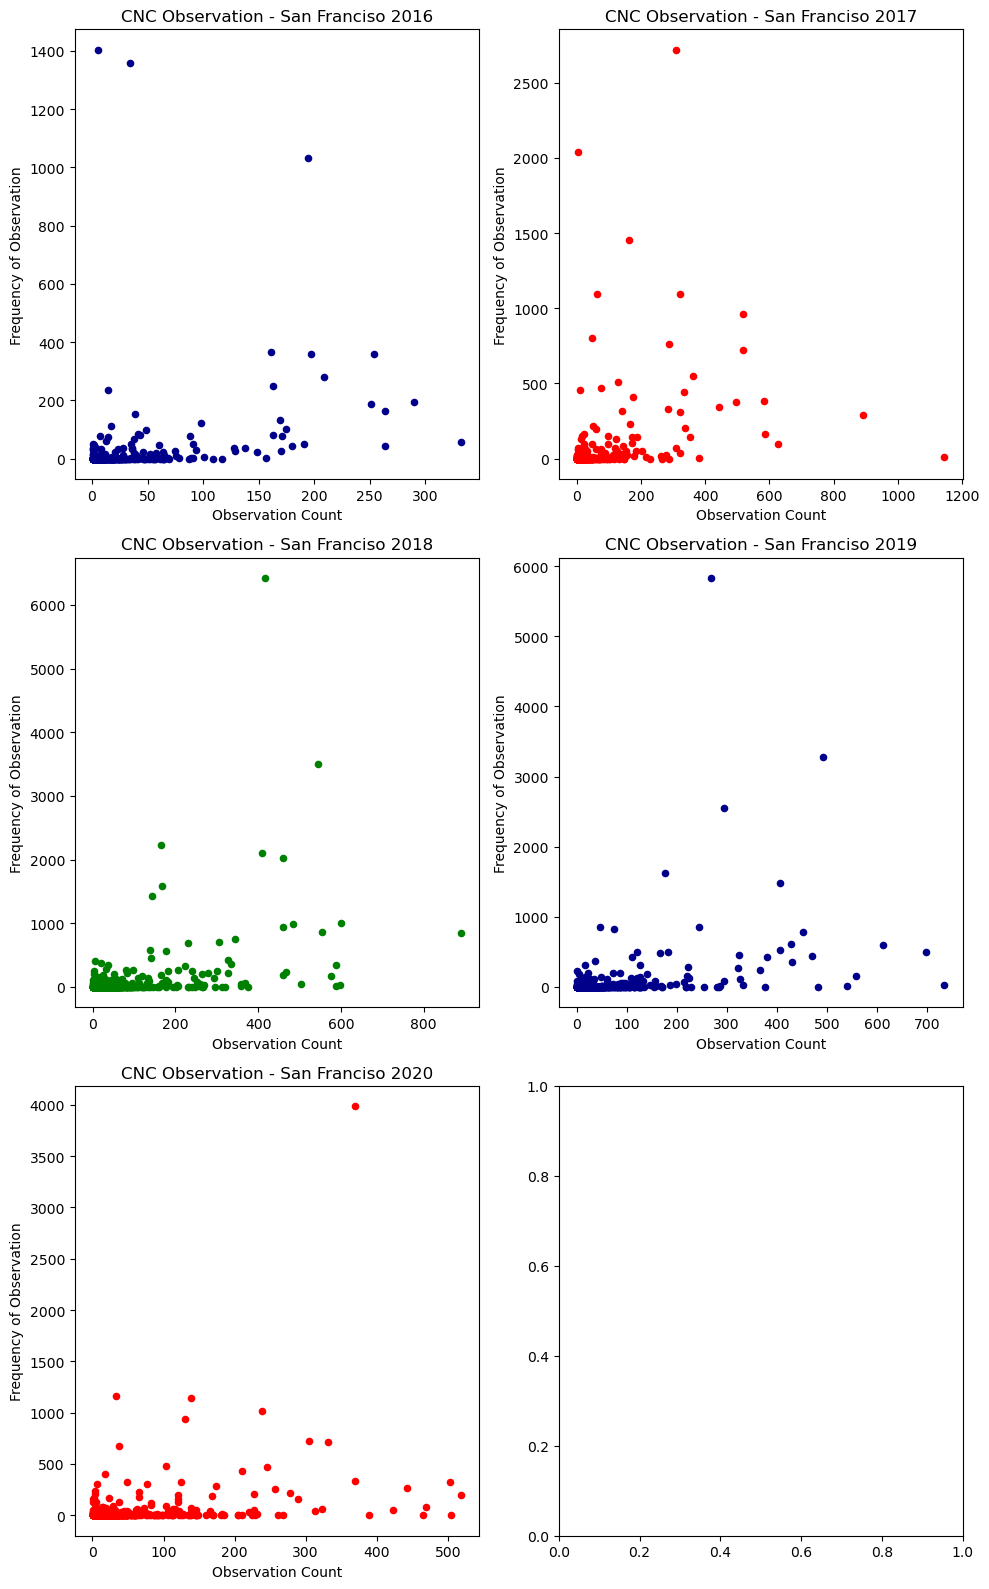

In [276]:
import matplotlib.pyplot as plt

# Create subplots with three figures and two plots in each row
fig, axes = plt.subplots(3, 2, figsize=(10, 16))


# Plot for London
cnc_obs_iden_2016.plot.scatter(x='n_obs', y='n_idents', c='darkblue', ax=axes[0, 0])
axes[0, 0].set_title('CNC Observation - San Franciso 2016')
axes[0, 0].set_xlabel('Observation Count')
axes[0, 0].set_ylabel('Frequency of Observation')

# Plot for Los Angeles
cnc_obs_iden_2017.plot.scatter(x='n_obs', y='n_idents', c='red', ax=axes[0, 1])
axes[0, 1].set_title('CNC Observation - San Franciso 2017')
axes[0, 1].set_xlabel('Observation Count')
axes[0, 1].set_ylabel('Frequency of Observation')

# Plot for San Francisco
cnc_obs_iden_2018.plot.scatter(x='n_obs', y='n_idents', c='green', ax=axes[1, 0])
axes[1, 0].set_title('CNC Observation - San Franciso 2018')
axes[1, 0].set_xlabel('Observation Count')
axes[1, 0].set_ylabel('Frequency of Observation')

# Plot for London (second figure)
cnc_obs_iden_2019.plot.scatter(x='n_obs', y='n_idents', c='darkblue', ax=axes[1, 1])
axes[1, 1].set_title('CNC Observation - San Franciso 2019')
axes[1, 1].set_xlabel('Observation Count')
axes[1, 1].set_ylabel('Frequency of Observation')

# Plot for Los Angeles (second figure)
cnc_obs_iden_2020.plot.scatter(x='n_obs', y='n_idents', c='red', ax=axes[2, 0])
axes[2, 0].set_title('CNC Observation - San Franciso 2020')
axes[2, 0].set_xlabel('Observation Count')
axes[2, 0].set_ylabel('Frequency of Observation')

plt.tight_layout()
plt.show()


## CNC OBSERVATION AND IDENTIFICATION 2016- 2023|

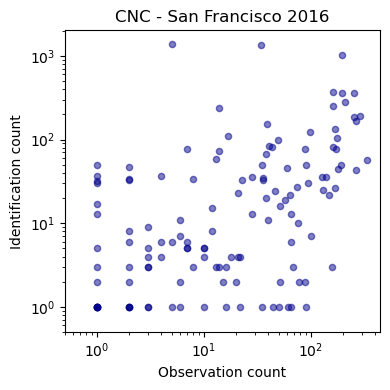

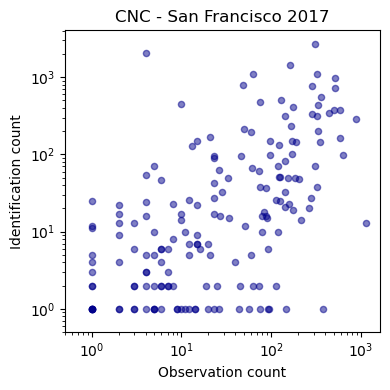

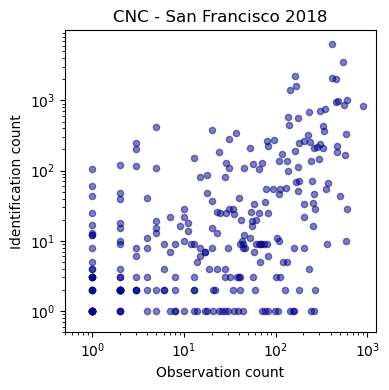

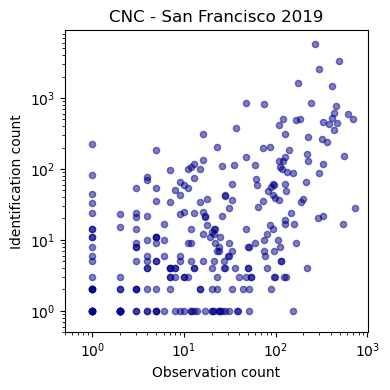

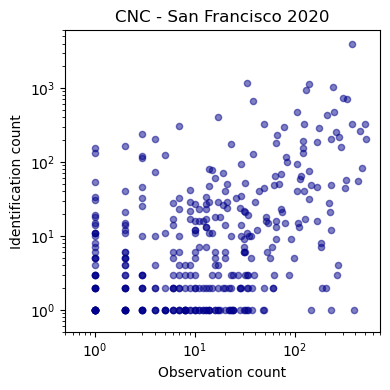

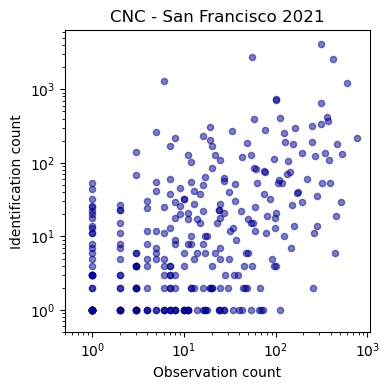

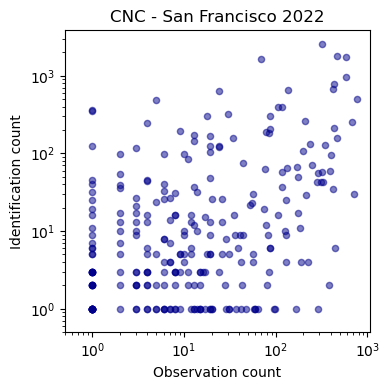

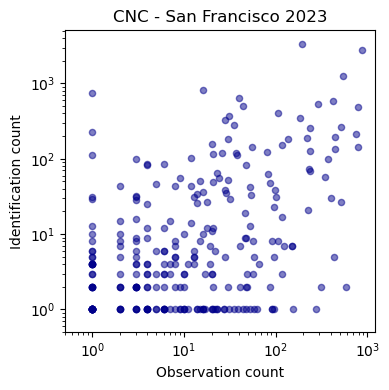

In [287]:
dataframes = [cnc_obs_iden_2016, cnc_obs_iden_2017, cnc_obs_iden_2018, cnc_obs_iden_2019, cnc_obs_iden_2020,cnc_obs_iden_2021,cnc_obs_iden_2022,cnc_obs_iden_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

for i, df in enumerate(dataframes): #loop through each DataFrame along with its index.
    fig, ax = plt.subplots(figsize=(4, 4))  # Create a new figure for each year
    df.plot.scatter(x='n_obs', y='n_idents', color='darkblue', ax=ax, alpha =0.5)
    ax.set_title(f'CNC - San Francisco {years[i]}')
    ax.set_xlabel('Observation count')
    ax.set_ylabel('Identification count')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(left=0.5)
    ax.set_ylim(bottom=0.5)
    plt.tight_layout()
    plt.show()  # Show each figure individually



### CNC - Cumulative observation and identification 

Text(0.5, 1.0, 'Cumulative Obs vs Iden 2016-2020 ')

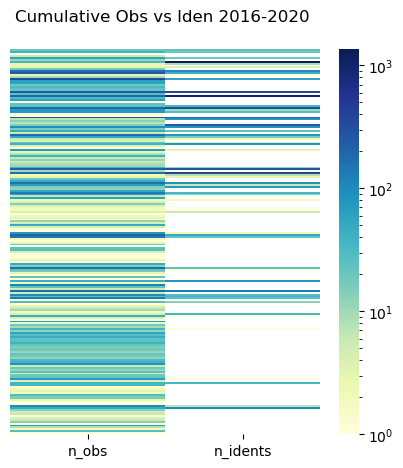

In [281]:
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
sns.heatmap(combined_cnc_df[['n_obs', 'n_idents']][:200], cmap="YlGnBu", fmt='g', ax=ax, yticklabels=False, norm=LogNorm())
ax.set_title('Cumulative Obs vs Iden 2016-2020 ',fontsize = 12, pad=20)

In [282]:
n_cnc = get_obs_ident_per_users(non_cnc_2016)
n_cnc.sort_values(by=['user_id'])


TypeError: get_obs_ident_per_users() missing 1 required positional argument: 'year'

In [283]:
non_cnc_obs_iden_2016 = get_obs_ident_per_users(non_cnc_2016,2016)
non_cnc_obs_iden_2017 = get_obs_ident_per_users(non_cnc_2017,2017)
non_cnc_obs_iden_2018 = get_obs_ident_per_users(non_cnc_2018,2018)
non_cnc_obs_iden_2019 = get_obs_ident_per_users(non_cnc_2019,2019)
non_cnc_obs_iden_2020 = get_obs_ident_per_users(non_cnc_2020,2020)
non_cnc_obs_iden_2021 = get_obs_ident_per_users(non_cnc_2021,2021)
non_cnc_obs_iden_2022 = get_obs_ident_per_users(non_cnc_2022,2022)
non_cnc_obs_iden_2023 = get_obs_ident_per_users(non_cnc_2023,2023)
#non_cnc_a = get_obs_ident_per_users(non_cnc_all)

In [284]:
list_of_dataframes = [non_cnc_2016, non_cnc_2017, non_cnc_2018, non_cnc_2019, non_cnc_2020,non_cnc_2021,non_cnc_2022,non_cnc_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

# Store results in a dictionary
results_by_year = {}

for i, df in enumerate(list_of_dataframes):
    year = years[i]
    results_by_year[year] = get_obs_ident_per_users(df, year)

In [285]:
combined_non_cnc_df = pd.concat(results_by_year.values(), ignore_index=True)
combined_non_cnc_df

user_id  n_obs  n_idents day_type  year
0          1704      2         0  Weekday  2016
1          5844      1         0  Weekday  2016
2         11548      3         0  Weekday  2016
3         16603     80        22  Weekday  2016
4         38816      1         0  Weekday  2016
...         ...    ...       ...      ...   ...
183600  7692821      9         1  Weekday  2023
183601  7328599      1         0  Weekday  2023
183602  1472878      2         0  Weekday  2023
183603  1797107      1         0  Weekday  2023
183604  6945448      1         0  Weekday  2023

[183605 rows x 5 columns]

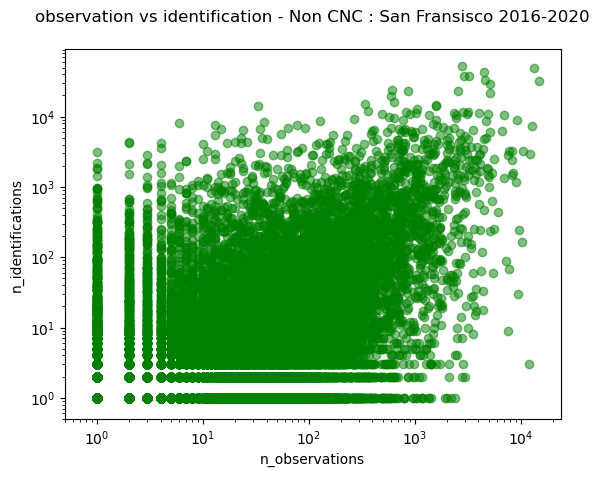

In [293]:
plt.scatter(combined_non_cnc_df['n_obs'], combined_non_cnc_df['n_idents'],color='green', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.gca().set_xlim(xmin=0.5)
plt.gca().set_ylim(ymin=0.5)
# Regression line
#sns.regplot(x='n_obs', y='n_idents', data=combined_non_cnc_df, scatter=False, color='red', line_kws={'alpha': alpha_value})

plt.title("observation vs identification - Non CNC : San Fransisco 2016-2020", pad=20)
plt.xlabel("n_observations")
plt.ylabel("n_identifications")
plt.show()

## NON CNC OBSERVATION AND IDENTIFICATION 2016- 2020

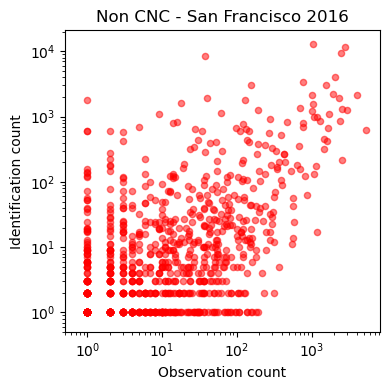

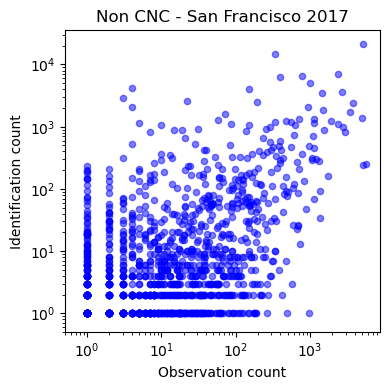

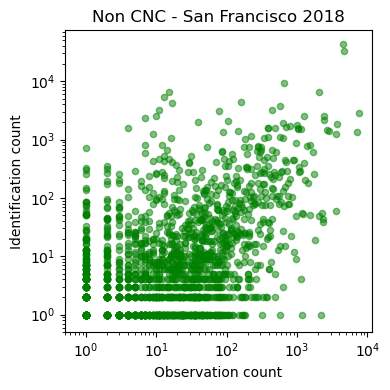

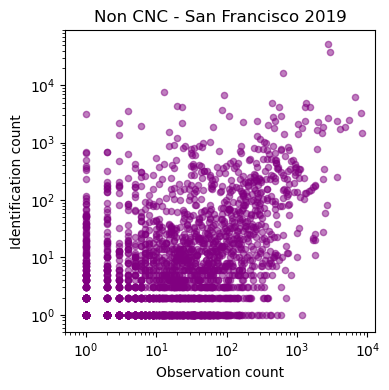

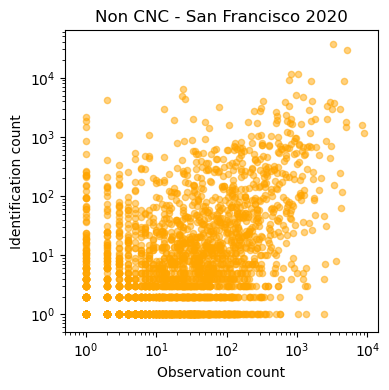

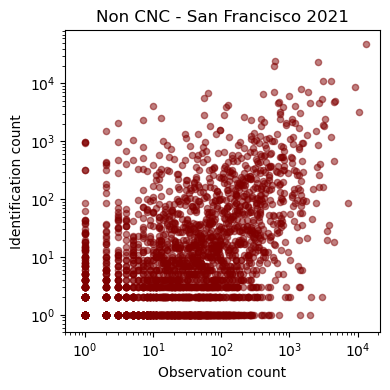

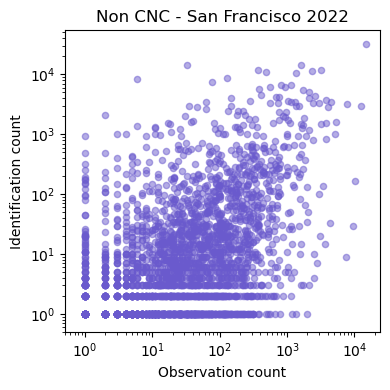

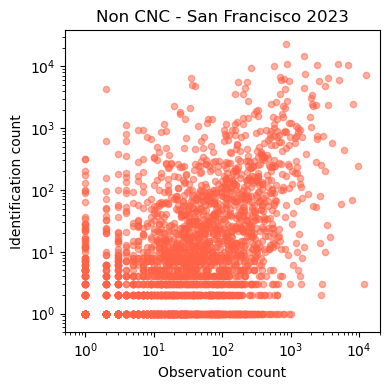

In [306]:

dataframes = [non_cnc_obs_iden_2016, non_cnc_obs_iden_2017, non_cnc_obs_iden_2018, non_cnc_obs_iden_2019, non_cnc_obs_iden_2020,non_cnc_obs_iden_2021,non_cnc_obs_iden_2022,non_cnc_obs_iden_2023]
years = [2016, 2017, 2018, 2019, 2020,2021,2022,2023]

colors = ['red', 'blue', 'green', 'purple', 'orange', 'maroon', 'slateblue', 'tomato']


for i, df in enumerate(dataframes):
    fig, ax = plt.subplots(figsize=(4, 4))  # Create a new figure for each year
    df.plot.scatter(x='n_obs', y='n_idents', color=colors[i], ax=ax,alpha=0.5)
    ax.set_title(f'Non CNC - San Francisco {years[i]}')
    ax.set_xlabel('Observation count')
    ax.set_ylabel('Identification count')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(left=0.5)
    ax.set_ylim(bottom=0.5)
    plt.tight_layout()
    plt.show()  # Show each figure individually


In [298]:
non_cnc.sort_values(by=['user_id'])

TypeError: get_obs_ident_per_users() missing 1 required positional argument: 'year'

In [ ]:
rslt_df = cnc_obs_counts.loc[(cnc_obs_counts['user_id'] == 1)]
rslt_df

In [300]:
def get_participation_all_cities(dfs, city_years):
    dfobs = []
    for city, years in city_years.items():
        for year in years:
            print(city, year)
            dfcity = dfs[city][year]
            dfobsident = get_obs_ident_per_users(dfcity)
            #dfobsident['city'] = city
            dfobsident['year'] = year
            dfobs.append(dfobsident)
    dfobs = pd.concat(dfobs)
    dfobs = dfobs.sort_values(by=['year', 'user_id'])
    return dfobs

dfobs = get_participation_all_cities(dfs, city_years)
dfobs

Francisco_Bay 2016


TypeError: get_obs_ident_per_users() missing 1 required positional argument: 'year'

In [ ]:
dfobs
rslt = dfobs.loc[(dfobs['user_id'] == 1)]
rslt

In [ ]:

u = len(dfobs['user_id'].value_counts())
u

In [ ]:

y = len(dfall['user_id'].value_counts())
y